Description:

Welcome to our cutting-edge Personalized Medical Recommendation System, a powerful platform designed to assist users in understanding and managing their health. Leveraging the capabilities of machine learning, our system analyzes user-input symptoms to predict potential diseases accurately.

Load dataset & tools

🔹 1. Objective
Now: Predict disease name (prognosis) → multi-class classification
Dataset is a shortened version from Kaggle with 4920 rows and 133 columns.

🔹 2. Data Description (Based on Disease Prediction Dataset)

✅ Feature Types:
All 132 input features are binary categorical:

Each column represents the presence (1) or absence (0) of a symptom (e.g., itching, skin_rash, fatigue, etc.)

These are not numerical like income or loan amount but are effectively 0/1 indicators.

✅ Target Variable:
prognosis — the disease to be predicted

It's a categorical variable with 40 unique disease classes (like Fungal infection, Diabetes, etc.)

✅ Example of Important Features (Symptoms):
Feature importance from models like Random Forest would typically highlight:
1.itching
2.skin_rash
3.high_fever
4.vomiting
5.fatigue
6.joint_pain

These are key symptoms that help differentiate between diseases.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/user/Downloads/ImmediateMedicineRecommendation/datasets/Training.csv")

In [3]:
df

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
0     ...           0         0             0                    0   
1     ...           0         0             0                    0   
2     ...           0         0             0                    0   
3     ...           0         0             0                    0   
4     ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4915  ...           0         0             0                    0   
4916  ...           1         1             0                    0   
4917  ...           0         0             0                    0   
4918  ...           0         0             1                    1   
4919  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                        0                   0        0                     0   
1                        0                   0        0                     0   
2                        0                   0        0                     0   
3                        0                   0        0                     0   
4                        0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4915                     0                   0        0                     0   
4916                     0                   0        0                     0   
4917                     0                   0        0                     0   
4918                     1                   1        0                     0   
4919                     0                   0        1                     1   

      yellow_crust_ooze                                prognosis  
0                     0                         Fungal infection  
1                     0                         Fungal infection  
2                     0                         Fungal infection  
3                     0                         Fungal infection  
4                     0                    

In [4]:
# 1. Basic Structure of the Dataset
#Shows column names, non-null counts, and data types.
#Useful to identify which columns may have missing values and data types (object = categorical, int/float = numerical).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [5]:
# 2. Descriptive Statistics
#Summarizes numerical columns (mean, std, min, max, etc.).
#Use df.describe(include='object') for categorical stats (count, unique, top, freq).
df.describe()

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000              1.000000             1.000000   

         shivering       chills   joint_pain  stomach_pain      acidity  \
count  4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
mean      0.021951     0.162195     0.139024      0.045122     0.045122   
std       0.146539     0.368667     0.346007      0.207593     0.207593   
min       0.000000     0.000000     0.000000      0.000000     0.000000   
25%       0.000000     0.000000     0.000000      0.000000     0.000000   
50%       0.000000     0.000000     0.000000      0.000000     0.000000   
75%       0.000000     0.000000     0.000000      0.000000     0.000000   
max       1.000000     1.000000     1.000000      1.000000     1.000000   

       ulcers_on_tongue  ...  pus_filled_pimples   blackheads     scurring  \
count       4920.000000  ...         4920.000000  4920.000000  4920.000000   
mean           0.021951  ...            0.021951     0.021951     0.021951   
std            0.146539  ...            0.146539     0.146539     0.146539   
min            0.000000  ...            0.000000     0.000000     0.000000   
25%            0.000000  ...            0.000000     0.000000     0.000000   
50%            0.000000  ...            0.000000     0.000000     0.000000   
75%            0.000000  ...            0.000000     0.000000     0.000000   
max            1.000000  ...            1.000000     1.000000     1.000000   

       skin_peeling  silver_like_dusting  small_dents_in_nails  \
count   4920.000000          4920.000000           4920.000000   
mean       0.023171             0.023171              0.023171   
std        0.150461             0.150461              0.150461   
min        0.000000             0.000000              0.000000   
25%        0.000000             0.000000              0.000000   
50%        0.000000             0.000000              0.000000   
75%        0.000000             0.000000              0.000000   
max        1.000000             1.000000              1.000000   

       inflammatory_nails      blister  red_sore_around_nose  \
count         4920.000000  4920.000000           4920.000000   
mean             0.023171     0.023171              0.023171   
std              0.150461     0.150461              0.150461   
min              0.000000     0.000000              0.000000   
25%              0.000000     0.000000              0.000000   
50%              0.000000     0.000000              0.000000   
75%              0.000000     0.000000              0.000000   
max              1.000000     1.000000              1.000000   

       yellow_crust_ooze  
count        4920.000000  
mean            0.023171  
std             0.150461  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

In [6]:
df.describe(include="object")

prognosis
count               4920
unique                41
top     Fungal infection
freq                 120

In [7]:
#3. Find Missing Values
#Shows how many nulls are in each column.
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [8]:
#To filter only columns with missing values:
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [9]:
#4. Identify Categorical vs Numerical Features
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['prognosis']
Numerical columns: ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'w

In [10]:
#5. Check Unique Values per Column (helps spot target column)
df.nunique()

itching                  2
skin_rash                2
nodal_skin_eruptions     2
continuous_sneezing      2
shivering                2
                        ..
inflammatory_nails       2
blister                  2
red_sore_around_nose     2
yellow_crust_ooze        2
prognosis               41
Length: 133, dtype: int64

In [11]:
# vals = df.values.flatten()

In [12]:
df.shape

(4920, 133)

In [13]:
X=df.copy()
X.describe(include="all")

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count   4920.000000  4920.000000           4920.000000          4920.000000   
unique          NaN          NaN                   NaN                  NaN   
top             NaN          NaN                   NaN                  NaN   
freq            NaN          NaN                   NaN                  NaN   
mean       0.137805     0.159756              0.021951             0.045122   
std        0.344730     0.366417              0.146539             0.207593   
min        0.000000     0.000000              0.000000             0.000000   
25%        0.000000     0.000000              0.000000             0.000000   
50%        0.000000     0.000000              0.000000             0.000000   
75%        0.000000     0.000000              0.000000             0.000000   
max        1.000000     1.000000              1.000000             1.000000   

          shivering       chills   joint_pain  stomach_pain      acidity  \
count   4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
unique          NaN          NaN          NaN           NaN          NaN   
top             NaN          NaN          NaN           NaN          NaN   
freq            NaN          NaN          NaN           NaN          NaN   
mean       0.021951     0.162195     0.139024      0.045122     0.045122   
std        0.146539     0.368667     0.346007      0.207593     0.207593   
min        0.000000     0.000000     0.000000      0.000000     0.000000   
25%        0.000000     0.000000     0.000000      0.000000     0.000000   
50%        0.000000     0.000000     0.000000      0.000000     0.000000   
75%        0.000000     0.000000     0.000000      0.000000     0.000000   
max        1.000000     1.000000     1.000000      1.000000     1.000000   

        ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count        4920.000000  ...  4920.000000  4920.000000   4920.000000   
unique               NaN  ...          NaN          NaN           NaN   
top                  NaN  ...          NaN          NaN           NaN   
freq                 NaN  ...          NaN          NaN           NaN   
mean            0.021951  ...     0.021951     0.021951      0.023171   
std             0.146539  ...     0.146539     0.146539      0.150461   
min             0.000000  ...     0.000000     0.000000      0.000000   
25%             0.000000  ...     0.000000     0.000000      0.000000   
50%             0.000000  ...     0.000000     0.000000      0.000000   
75%             0.000000  ...     0.000000     0.000000      0.000000   
max             1.000000  ...     1.000000     1.000000      1.000000   

        silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count           4920.000000           4920.000000         4920.000000   
unique                  NaN                   NaN                 NaN   
top                     NaN                   NaN                 NaN   
freq                    NaN                   NaN                 NaN   
mean               0.023171              0.023171            0.023171   
std                0.150461              0.150461            0.150461   
min                0.000000              0.000000            0.000000   
25%                0.000000              0.000000            0.000000   
50%                0.000000              0.000000            0.000000   
75%                0.000000              0.000000            0.000000   
max                1.000000              1.000000            1.000000   

            blister  red_sore_around_nose  yellow_crust_ooze         prognosis  
count   4920.000000           4920.000000        4920.000000              4920  
unique          NaN                   NaN                NaN                41  
top             NaN                   NaN                NaN  Fungal infection  
freq            NaN                   NaN                NaN            

In [14]:
df.describe(include="all")

itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count   4920.000000  4920.000000           4920.000000          4920.000000   
unique          NaN          NaN                   NaN                  NaN   
top             NaN          NaN                   NaN                  NaN   
freq            NaN          NaN                   NaN                  NaN   
mean       0.137805     0.159756              0.021951             0.045122   
std        0.344730     0.366417              0.146539             0.207593   
min        0.000000     0.000000              0.000000             0.000000   
25%        0.000000     0.000000              0.000000             0.000000   
50%        0.000000     0.000000              0.000000             0.000000   
75%        0.000000     0.000000              0.000000             0.000000   
max        1.000000     1.000000              1.000000             1.000000   

          shivering       chills   joint_pain  stomach_pain      acidity  \
count   4920.000000  4920.000000  4920.000000   4920.000000  4920.000000   
unique          NaN          NaN          NaN           NaN          NaN   
top             NaN          NaN          NaN           NaN          NaN   
freq            NaN          NaN          NaN           NaN          NaN   
mean       0.021951     0.162195     0.139024      0.045122     0.045122   
std        0.146539     0.368667     0.346007      0.207593     0.207593   
min        0.000000     0.000000     0.000000      0.000000     0.000000   
25%        0.000000     0.000000     0.000000      0.000000     0.000000   
50%        0.000000     0.000000     0.000000      0.000000     0.000000   
75%        0.000000     0.000000     0.000000      0.000000     0.000000   
max        1.000000     1.000000     1.000000      1.000000     1.000000   

        ulcers_on_tongue  ...   blackheads     scurring  skin_peeling  \
count        4920.000000  ...  4920.000000  4920.000000   4920.000000   
unique               NaN  ...          NaN          NaN           NaN   
top                  NaN  ...          NaN          NaN           NaN   
freq                 NaN  ...          NaN          NaN           NaN   
mean            0.021951  ...     0.021951     0.021951      0.023171   
std             0.146539  ...     0.146539     0.146539      0.150461   
min             0.000000  ...     0.000000     0.000000      0.000000   
25%             0.000000  ...     0.000000     0.000000      0.000000   
50%             0.000000  ...     0.000000     0.000000      0.000000   
75%             0.000000  ...     0.000000     0.000000      0.000000   
max             1.000000  ...     1.000000     1.000000      1.000000   

        silver_like_dusting  small_dents_in_nails  inflammatory_nails  \
count           4920.000000           4920.000000         4920.000000   
unique                  NaN                   NaN                 NaN   
top                     NaN                   NaN                 NaN   
freq                    NaN                   NaN                 NaN   
mean               0.023171              0.023171            0.023171   
std                0.150461              0.150461            0.150461   
min                0.000000              0.000000            0.000000   
25%                0.000000              0.000000            0.000000   
50%                0.000000              0.000000            0.000000   
75%                0.000000              0.000000            0.000000   
max                1.000000              1.000000            1.000000   

            blister  red_sore_around_nose  yellow_crust_ooze         prognosis  
count   4920.000000           4920.000000        4920.000000              4920  
unique          NaN                   NaN                NaN                41  
top             NaN                   NaN                NaN  Fungal infection  
freq            NaN                   NaN                NaN            

🔹 2. Preprocessing Data

Check	                   Result	                                 Action Needed?
Null Values	           ❌ None found	                                  No
Duplicates	        ⚠️ 4616 duplicate rows     	Yes (if you want unique records only)
Data Types	      ✅ All numeric + 1 categorical	                      No
Outliers	       ❌ Not applicable (binary data)                     	  No
Feature Scaling Needed	❌ No (binary 0/1 features)	                      No
Target Label Encoding	  ✅ Required	                                  Yes

✅ Preprocessing Required
To prepare this dataset for model training:

Handle Duplicates (Optional):

If you want to avoid overfitting, consider removing them.

Otherwise, you can keep them to maintain class balance.

Encode Target Column (prognosis):

Convert categorical disease names into numerical labels using LabelEncoder.

Searching for Null Values

Changing non-numeric values to numeric values

In [22]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(X['prognosis'])  # Use the original DataFrame

# Optional: check the encoded values
print(y)

# Save mapping from disease names to integers
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)
X['prognosis'] = y 

# Check data types in the original DataFrame
print(X.describe(include="all"))
print(X.dtypes)



[15 15 15 ... 38 35 27]
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40}
           itching    skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  4920.000000  4920.000000           4920.000000          4920.000000   
mean      0.137805     0.159756              0.021951             0.045122   
std       0.344730     0.366417              0.146539             0.207593   
min       0.000000     0.000000              0.000000             0.000000   
25%       0.000000     0.000000              0.000000             0.000000   
50%       0.000000     0.000000              0.000000             0.000000   
75%       0.000000     0.000000              0.000000             0.000000   
max       1.000000     1.000000            

In [23]:
#Handle Missing Values:-

#Binary columns (0/1 or categorical encoded)
#Use mode (most frequent value):
for col in X.columns:
    if X[col].nunique() <= 2 and X[col].isnull().sum() > 0:
        mode = X[col].mode()
        if not mode.empty:
            X[col] = X[col].fillna(mode[0])
print(X.isnull().sum())
print(X[X.isnull().any(axis=1)])


itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
Empty DataFrame
Columns: [itching, skin_rash, nodal_skin_eruptions, continuous_sneezing, shivering, chills, joint_pain, stomach_pain, acidity, ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition, spotting_ urination, fatigue, weight_gain, anxiety, cold_hands_and_feets, mood_swings, weight_loss, restlessness, lethargy, patches_in_throat, irregular_sugar_level, cough, high_fever, sunken_eyes, breathlessness, sweating, dehydration, indigestion, headache, yellowish_skin, dark_urine, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, constipation, abdominal_pain, diarrhoea, mild_fever, yellow_urine, yellowing_of_eyes, acute_liver_failure, fluid_overload, swelling_o

In [24]:
print("Null values count:\n",X.isnull().sum())

Null values count:
 itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64


We donot have any null values but lets visualise the null values using heatmap.

Visualizing Null values using heatmap

<Axes: >

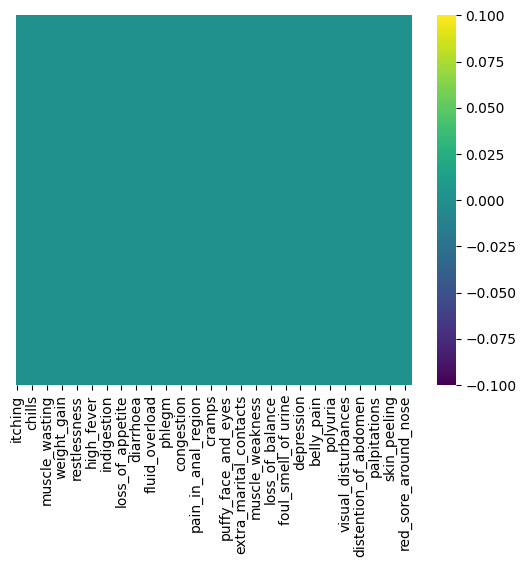

In [25]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=True,cmap='viridis')

So we don't need to handle the null values in this case.So now we are moving on to find any outliers in our data and find the correlations of different attributes to our target i.e. 'Prognosis' column in the dataset.

Checking correlation of every attribute with our target attribute i.e. 'Prognosis'

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode target
print(X)

# Select only numeric feature columns (excluding target columns)
features = X.drop(columns=['prognosis']).select_dtypes(include=['int64', 'float64']).columns
print(features)
print("\n\nCorrelation of each attribute with prognosis: \n")

for i in features:
    if df[i].std() != 0:  # Skip constant columns
        corr = df[i].corr(X['prognosis'])
        print(f"{i}: {corr}")



      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

### Checking for Outliers

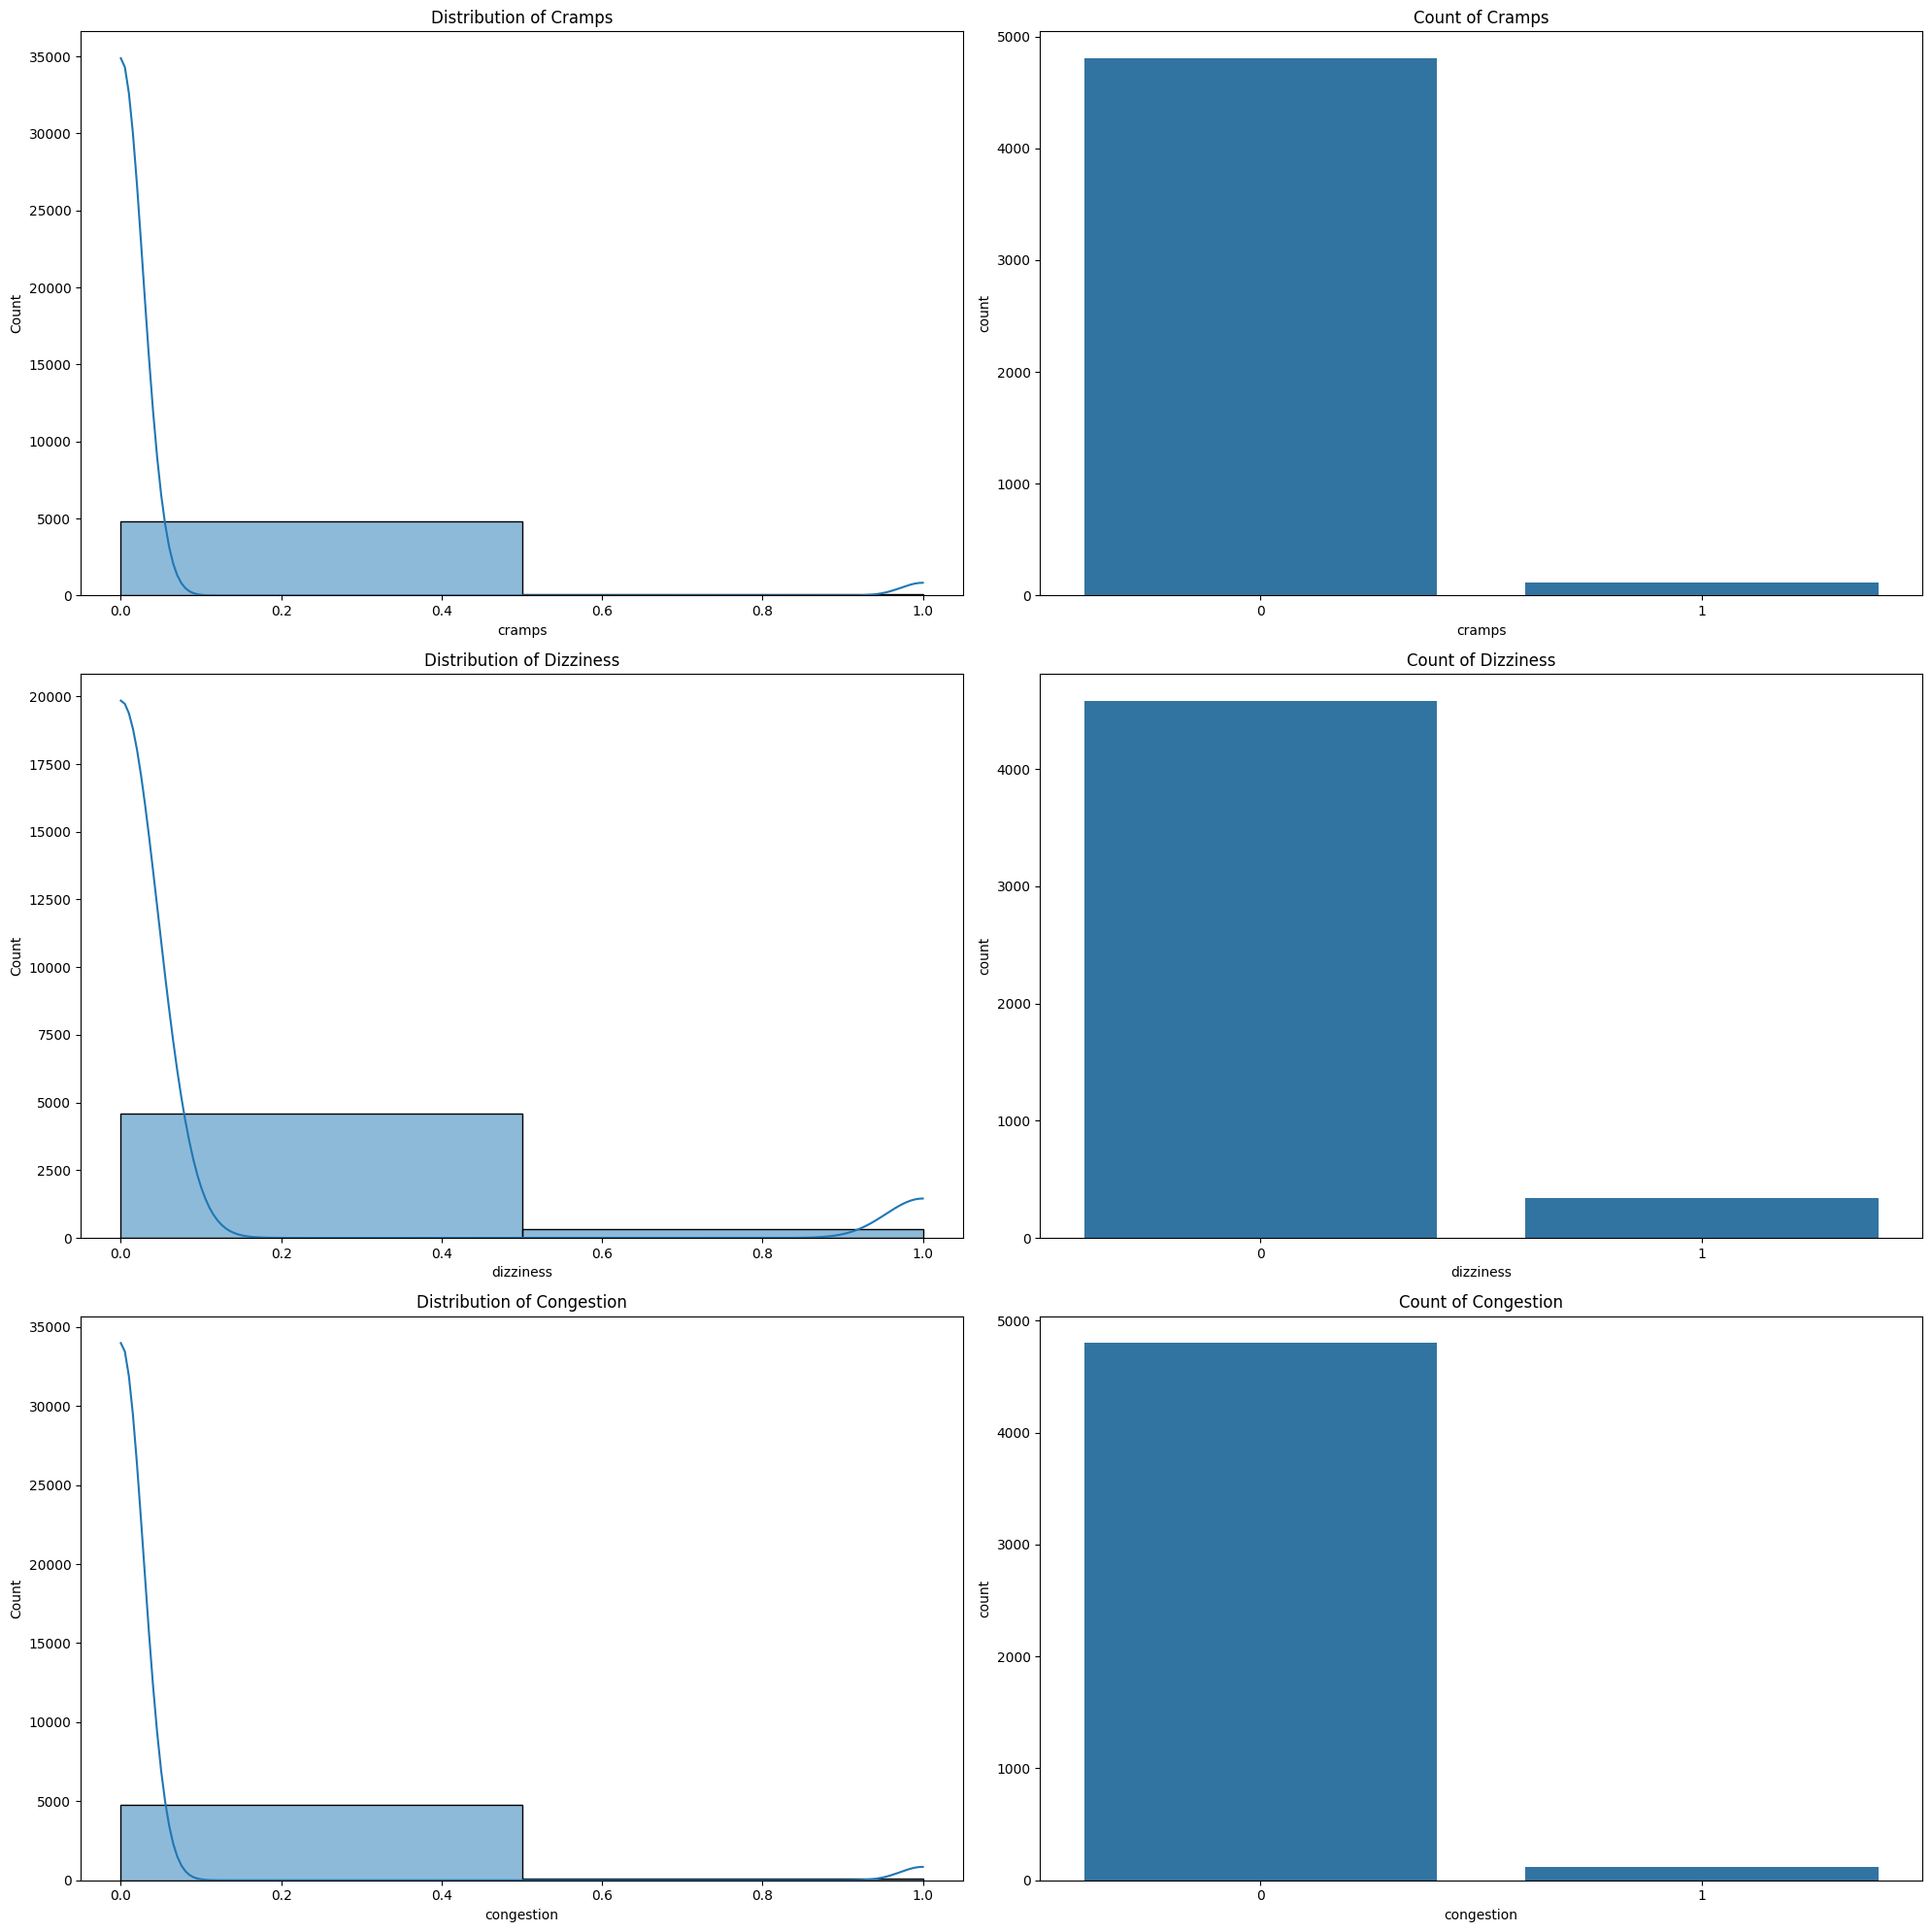

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(20, 20))

# Cramps
sns.histplot(X["cramps"], kde=True, bins=2, ax=axes[0][0])
axes[0][0].set_title("Distribution of Cramps")
sns.countplot(x="cramps", data=X, ax=axes[0][1])
axes[0][1].set_title("Count of Cramps")

# Dizziness
sns.histplot(X["dizziness"], kde=True, bins=2, ax=axes[1][0])
axes[1][0].set_title("Distribution of Dizziness")
sns.countplot(x="dizziness", data=X, ax=axes[1][1])
axes[1][1].set_title("Count of Dizziness")

# Congestion
sns.histplot(X["congestion"], kde=True, bins=2, ax=axes[2][0])
axes[2][0].set_title("Distribution of Congestion")
sns.countplot(x="congestion", data=X, ax=axes[2][1])
axes[2][1].set_title("Count of Congestion")

plt.tight_layout()
plt.show()


### Outlier Detection

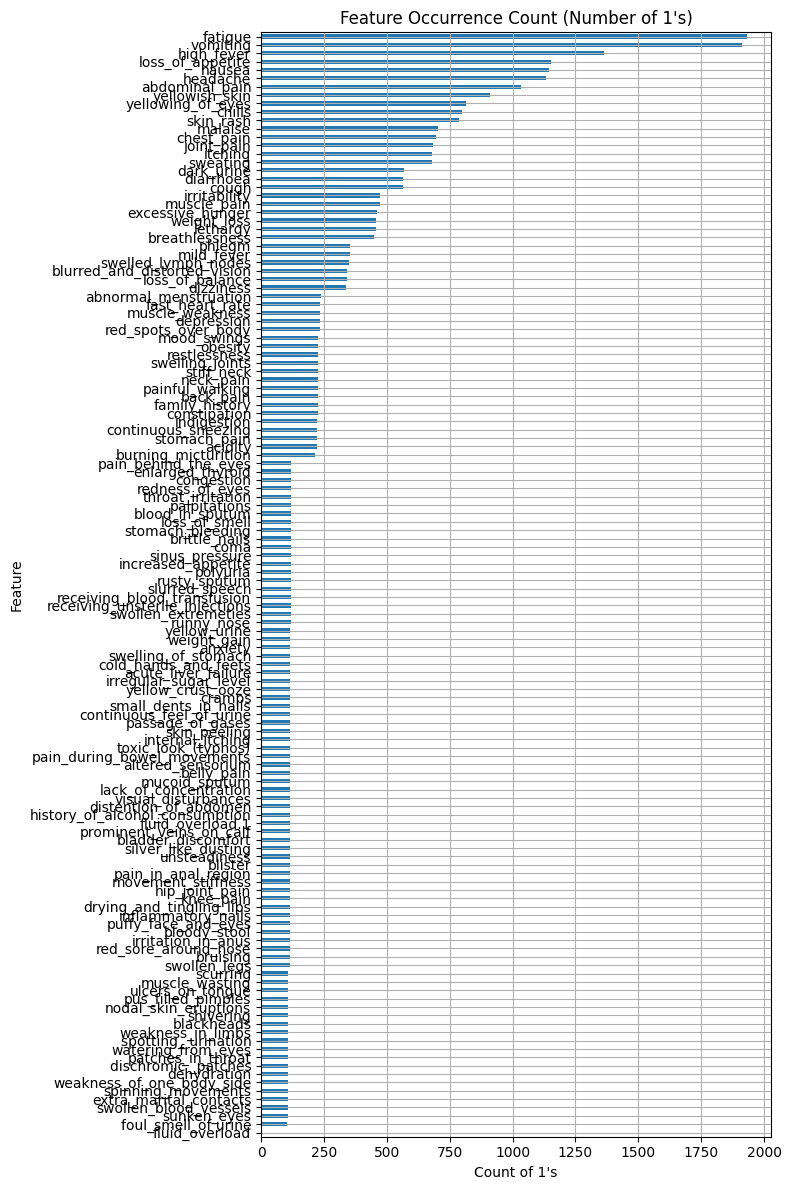

In [28]:
#❗️Outlier Detection with MAD Is Not Needed for Binary Data
#What You Can Do Instead
#1. Check for imbalanced binary features
#You might want to visualize how frequently 0 and 1 occur in each feature (column).
#2. Visualize binary feature distributions (bar chart)

#This helps you spot:
#Rare features (low occurrence of 1s)
#Possibly irrelevant features
import matplotlib.pyplot as plt

# Bar chart showing number of 1s in each binary feature
X.drop(columns=['prognosis']).sum().sort_values().plot(kind='barh', figsize=(8, 12))
plt.title("Feature Occurrence Count (Number of 1's)")
plt.xlabel("Count of 1's")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()


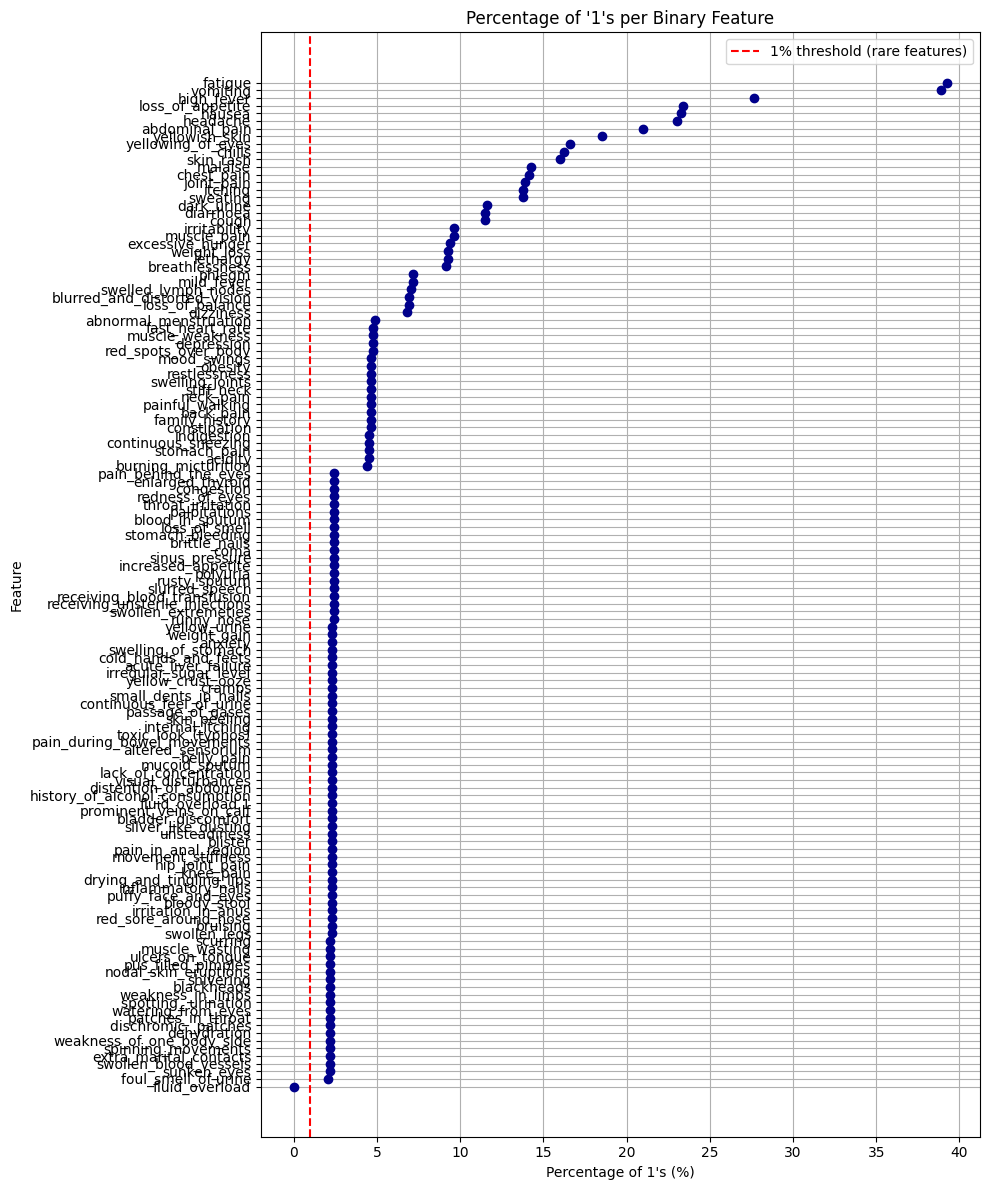

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate features and target
B = X.drop(columns=["prognosis"])  # Adjust 'prognosis' if your target column is named differently

# Calculate percentage of 1's for each binary feature
feature_1_percent = (B.sum() / len(B) * 100).sort_values()

# Create a dot plot
plt.figure(figsize=(10, 12))
plt.plot(feature_1_percent.values, feature_1_percent.index, 'o', color='darkblue')
plt.axvline(x=1, color='red', linestyle='--', label='1% threshold (rare features)')
plt.title("Percentage of '1's per Binary Feature")
plt.xlabel("Percentage of 1's (%)")
plt.ylabel("Feature")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, itching to yellow_crust_ooze
dtypes: int64(132)
memory usage: 5.0 MB


Since your dataset (Training.csv) contains mostly binary features (0/1) and a categorical target (prognosis), outlier detection isn't meaningful in the traditional sense (like MAD or Isolation Forest), because:
1.Binary features (0/1) have no extreme values.
2.Any deviation from 0 or 1 would already be data corruption.
3.MAD (Median Absolute Deviation) or Isolation Forest are designed for continuous numeric data, not binary symptom flags.
✅ What You Can Do Instead: "Feature Frequency Analysis"
You can analyze feature presence (how often a symptom = 1) before and after any data cleaning or filtering. This simulates a "before/after" view that’s actually meaningful for binary data.

🔧 CODE: Visualize Binary Features (0/1) — Before and After
🔹 Step 1: Count 1s per feature before filtering

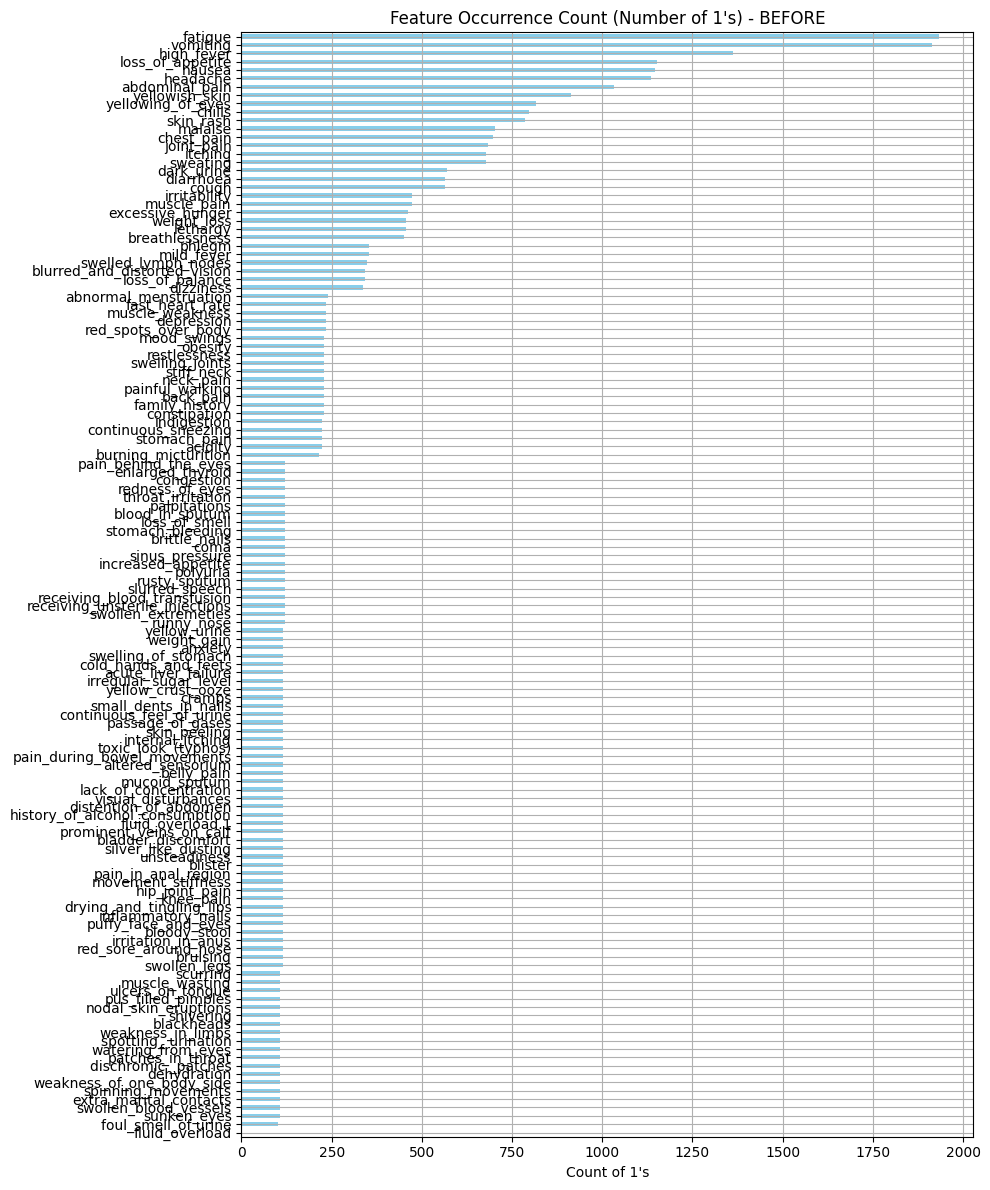

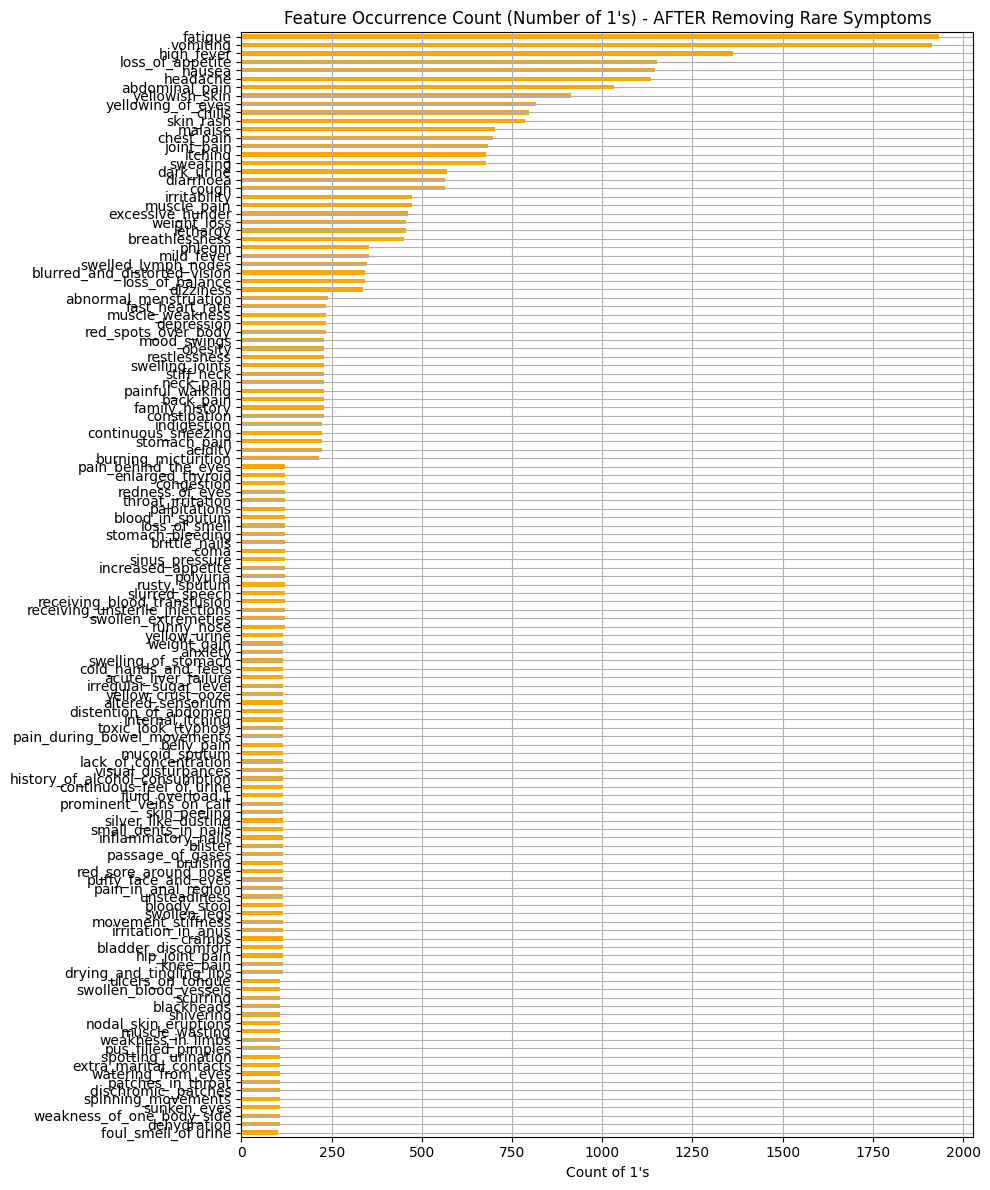

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop target column
S = X.drop(columns=['prognosis'])

# Count number of 1s in each binary feature (before)
feature_sum_before = S.sum().sort_values()

# Filter out rare features (those that have fewer than 5 occurrences of '1')
X_filtered = S.loc[:, S.sum() >= 5]

# Count number of 1s after filtering
feature_sum_after = X_filtered.sum().sort_values()

# Plot
plt.figure(figsize=(10, 12))
feature_sum_before.plot(kind='barh', color='skyblue')
plt.title("Feature Occurrence Count (Number of 1's) - BEFORE")
plt.xlabel("Count of 1's")
plt.tight_layout()
plt.grid(True)
plt.show()

# Plot AFTER
plt.figure(figsize=(10, 12))
feature_sum_after.plot(kind='barh', color='orange')
plt.title("Feature Occurrence Count (Number of 1's) - AFTER Removing Rare Symptoms")
plt.xlabel("Count of 1's")
plt.tight_layout()
plt.grid(True)
plt.show()


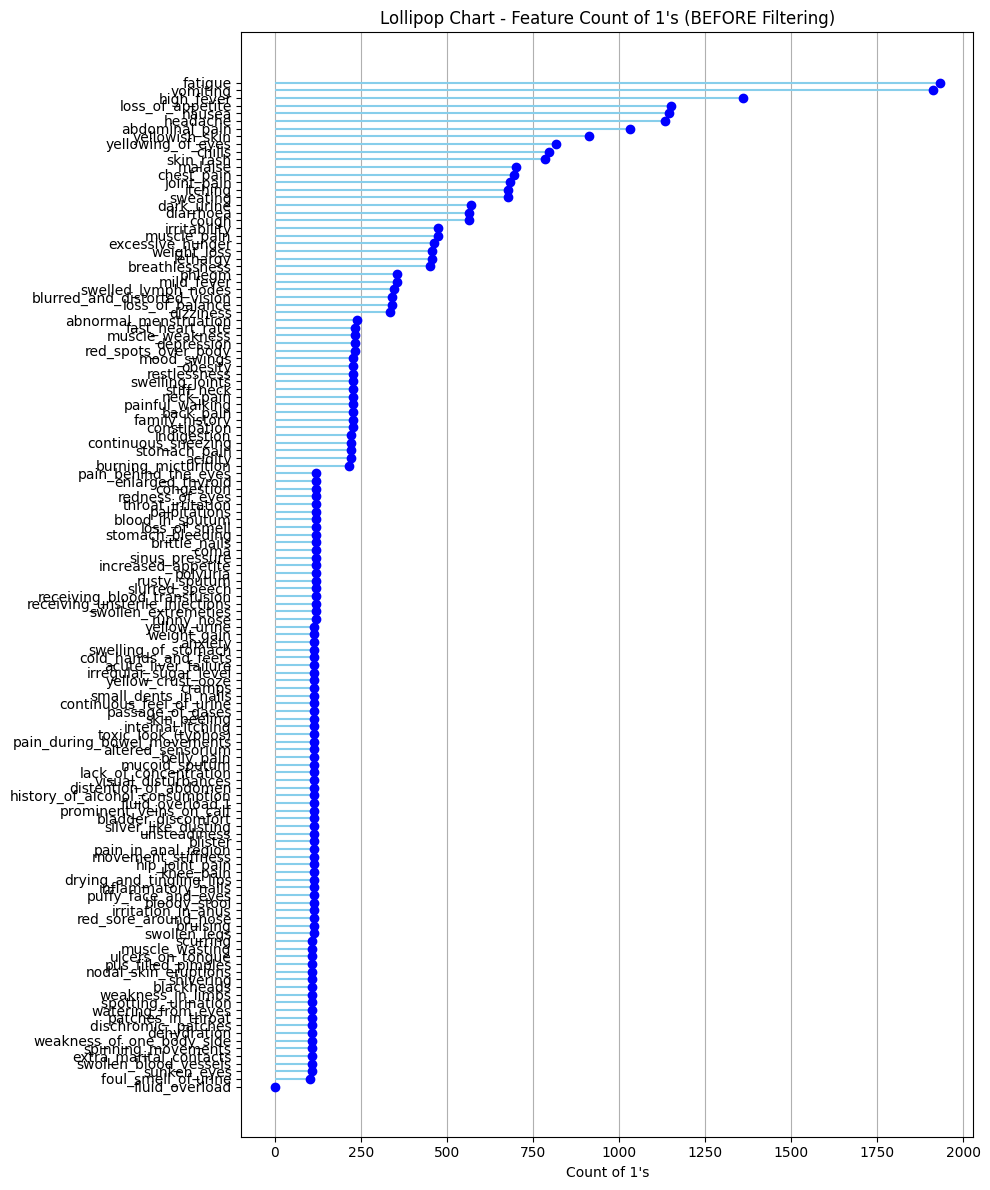

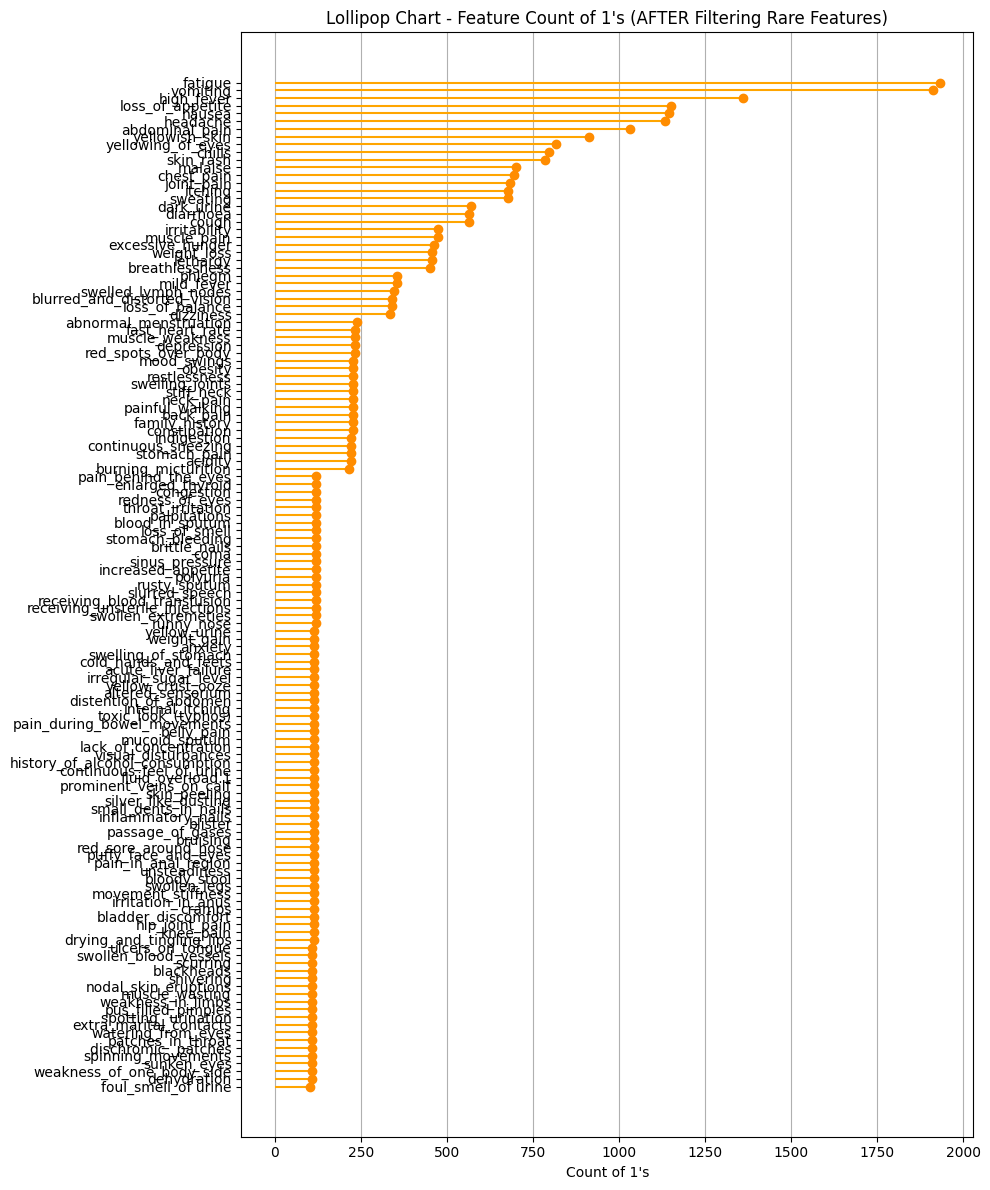

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop target column
S = X.drop(columns=['prognosis'])

# Count number of 1s in each binary feature (before)
feature_sum_before = S.sum().sort_values()

# Filter out rare features (those that have fewer than 5 occurrences of '1')
X_filtered = S.loc[:, S.sum() >= 5]

# Count number of 1s after filtering
feature_sum_after = X_filtered.sum().sort_values()

# --- Plot BEFORE (Lollipop) ---
plt.figure(figsize=(10, 12))
plt.hlines(y=feature_sum_before.index, xmin=0, xmax=feature_sum_before.values, color='skyblue')
plt.plot(feature_sum_before.values, feature_sum_before.index, 'o', color='blue')
plt.title("Lollipop Chart - Feature Count of 1's (BEFORE Filtering)")
plt.xlabel("Count of 1's")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# --- Plot AFTER (Lollipop) ---
plt.figure(figsize=(10, 12))
plt.hlines(y=feature_sum_after.index, xmin=0, xmax=feature_sum_after.values, color='orange')
plt.plot(feature_sum_after.values, feature_sum_after.index, 'o', color='darkorange')
plt.title("Lollipop Chart - Feature Count of 1's (AFTER Filtering Rare Features)")
plt.xlabel("Count of 1's")
plt.grid(axis='x')
plt.tight_layout()
plt.show()


✅ 1. Save Filtered Dataset

In [33]:
filtered_df = X.loc[:, X.sum() >= 5].copy()
filtered_df['prognosis'] = X['prognosis']
filtered_df.to_csv("Filtered_Training.csv", index=False)
print("Filtered dataset saved as 'Filtered_Training.csv'")

Filtered dataset saved as 'Filtered_Training.csv'


✅ 2. Save List of Removed Features

In [34]:
removed_features = X.columns[X.sum() < 5].tolist()
with open("Removed_Features.txt", "w") as f:
    f.write("\n".join(removed_features))

This will:
1.Save the cleaned dataset to Filtered_Training.csv
2.Save removed features (rare binary columns) to Removed_Features.txt

In [35]:
filtered_df.shape

(4920, 132)

In [36]:
X.shape

(4920, 133)

From the plots above we saw how we can handle the outliers, now we can use the data to train a Random Forest Classifier model. We will be training a Random Forest Classifier model to determine the principal attributes in the dataset.

Visualising some other attributes against the other data columns and using our target attribute i.e. "Prognosis" as hue.

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)


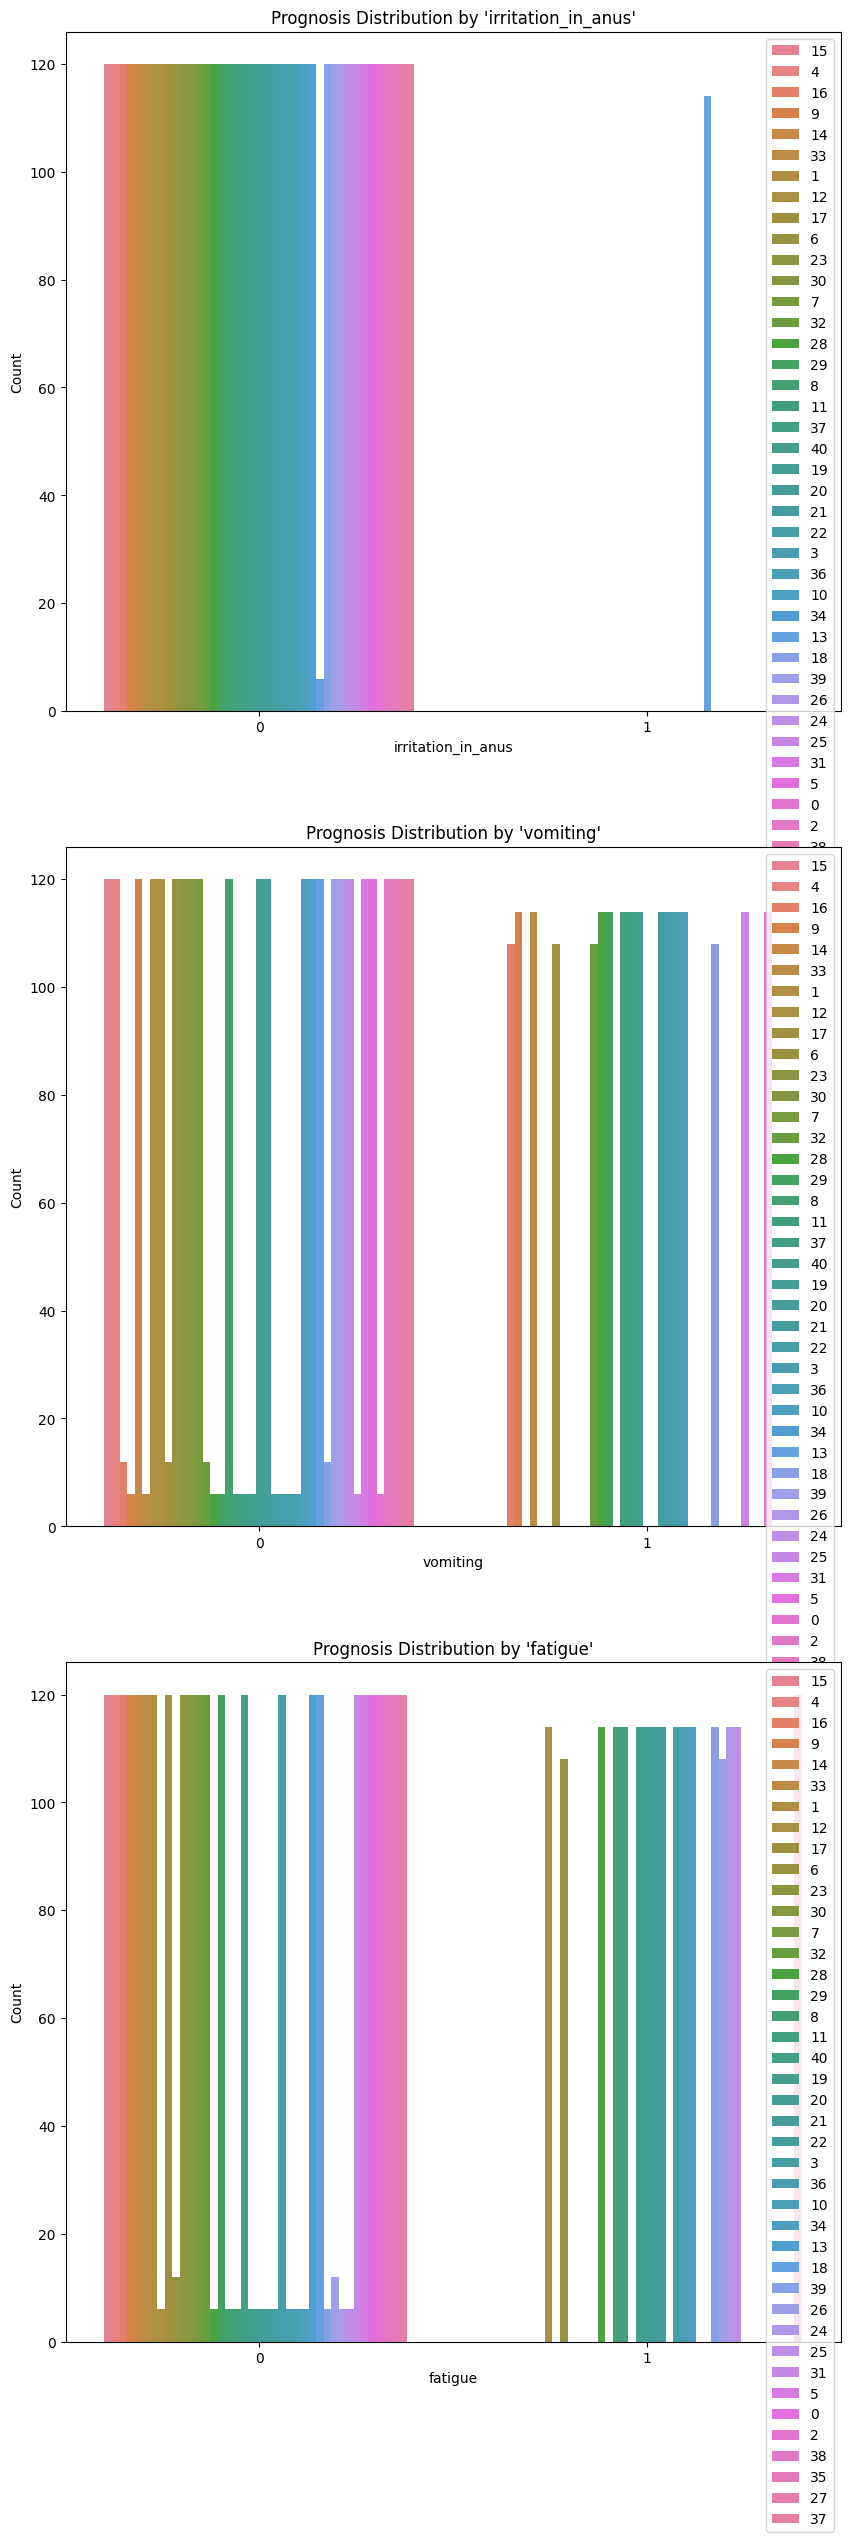

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check column names
print(X.columns)

# Convert target column to string (optional but helpful for hue separation)
X['prognosis'] = X['prognosis'].astype(str)

# List of symptoms to visualize
symptoms = ['irritation_in_anus','vomiting', 'fatigue']  # Update as per your actual column names

# Plot countplots
fig, axes = plt.subplots(len(symptoms), 1, figsize=(10, 30))
for i, symptom in enumerate(symptoms):
    sns.countplot(x=symptom, hue='prognosis', data=X, ax=axes[i])
    axes[i].set_title(f"Prognosis Distribution by '{symptom}'")
    axes[i].set_xlabel(symptom)
    axes[i].set_ylabel("Count")
    axes[i].legend(loc='upper right')


plt.show()


##### 🔹 3. Feature Selection
We would do:
Use RandomForestClassifier().feature_importances_ to find top symptoms impacting diagnosis


✅ Random Forest Classifier

Training a Random Forest Classifier to determine the principal attributes as this classifier has a built-in feature importance function.


In [38]:
#importing required module
from sklearn.ensemble import RandomForestClassifier

✅ When to Perform Feature Importance Analysis
🔹 Correct Approach:
👉 Split your data into training and test sets first
👉 Then perform feature importance only on the training data
💡 Why?

If you calculate feature importance using the entire dataset before splitting, you're leaking information from the test set into your model. This is a form of data leakage, and it can:

1.Overestimate feature importance

2.Cause inflated performance scores

3.Make the model less generalizable


In [39]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, itching to prognosis
dtypes: int64(132)
memory usage: 5.0 MB


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [41]:
C=filtered_df.copy()

In [42]:
C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, itching to prognosis
dtypes: int64(132)
memory usage: 5.0 MB


In [43]:
C

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
0     ...           0         0             0                    0   
1     ...           0         0             0                    0   
2     ...           0         0             0                    0   
3     ...           0         0             0                    0   
4     ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4915  ...           0         0             0                    0   
4916  ...           1         1             0                    0   
4917  ...           0         0             0                    0   
4918  ...           0         0             1                    1   
4919  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                        0                   0        0                     0   
1                        0                   0        0                     0   
2                        0                   0        0                     0   
3                        0                   0        0                     0   
4                        0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4915                     0                   0        0                     0   
4916                     0                   0        0                     0   
4917                     0                   0        0                     0   
4918                     1                   1        0                     0   
4919                     0                   0        1                     1   

      yellow_crust_ooze  prognosis  
0                     0         15  
1                     0         15  
2                     0         15  
3                     0         15  
4                     0         15  
...                 ...        ...  
4915                  0          0  
4916                  0          2  
4917                  0         38  
4918    

✅ Part 1: Splitting the dataset

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load your dataset
# C = pd.read_csv("your_data.csv")  # Uncomment and set correct path if loading from file

# Separate features and target
S = C.drop(columns=['prognosis'])  # Features
y = C['prognosis']                 # Target

# Stratified train-test split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    S, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (3936, 131)
Testing set size: (984, 131)


✅ Part 2: Training Model Code (Only Training Step)

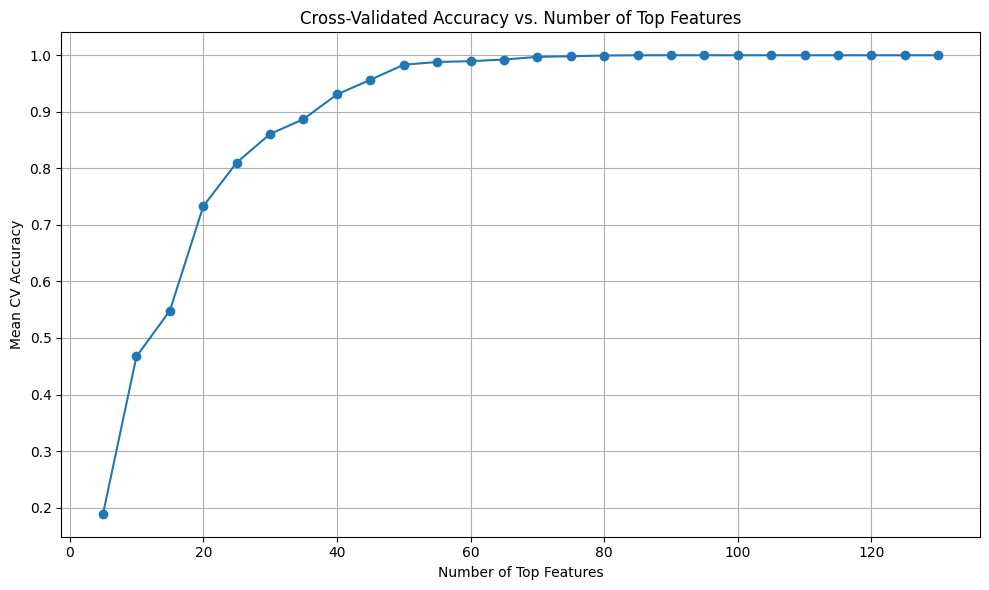

Optimal number of features: 85


In [46]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Train initial model to get all feature importances
initial_model = RandomForestClassifier(n_estimators=100, random_state=42)
initial_model.fit(X_train, y_train)

# Get sorted features by importance
importances = pd.Series(initial_model.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values(ascending=False)

# Try different numbers of top-N features
n_range = range(5, len(X_train.columns)+1, 5)
cv_scores = []

for n in n_range:
    top_n_features = importances_sorted.head(n).index
    X_n = X_train[top_n_features]

    # Cross-validated accuracy (5-fold CV)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    scores = cross_val_score(rf, X_n, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plotting performance vs number of features
plt.figure(figsize=(10, 6))
plt.plot(n_range, cv_scores, marker='o')
plt.title("Cross-Validated Accuracy vs. Number of Top Features")
plt.xlabel("Number of Top Features")
plt.ylabel("Mean CV Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# Find optimal number of features
optimal_n = n_range[np.argmax(cv_scores)]
print(f"Optimal number of features: {optimal_n}")


In [47]:
# Use optimal number of features found via cross-validation
top_n = 50  # Replace 49 with the actual optimal number
top_features = importances_sorted.head(top_n).index.tolist()

# Prepare training and testing data with the selected top-N features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


✅Part 3: Updated Training Code with Accuracy & Report

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train final Random Forest model on selected features
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_selected, y_train)

# Evaluate on training data
y_train_pred = final_model.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))

missing_classes = set(np.unique(y_train)) - set(np.unique(y_train_pred))
print("Classes not predicted by the model:", missing_classes)



Training Accuracy: 0.983739837398374
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      0.91      0.95        96
           2       0.70      1.00      0.82        96
           3       1.00      1.00      1.00        96
           4       1.00      0.90      0.95        96
           5       1.00      0.96      0.98        96
           6       1.00      1.00      1.00        96
           7       1.00      0.95      0.97        96
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00        96
          11       1.00      1.00      1.00        96
          12       1.00      0.95      0.97        96
          13       1.00      0.98      0.99        96
          14       1.00      1.00      1.00        96
          15       1.00      1.00      1.00        96
          16

✅ Part 4: ROC Curve and AUC Evaluation

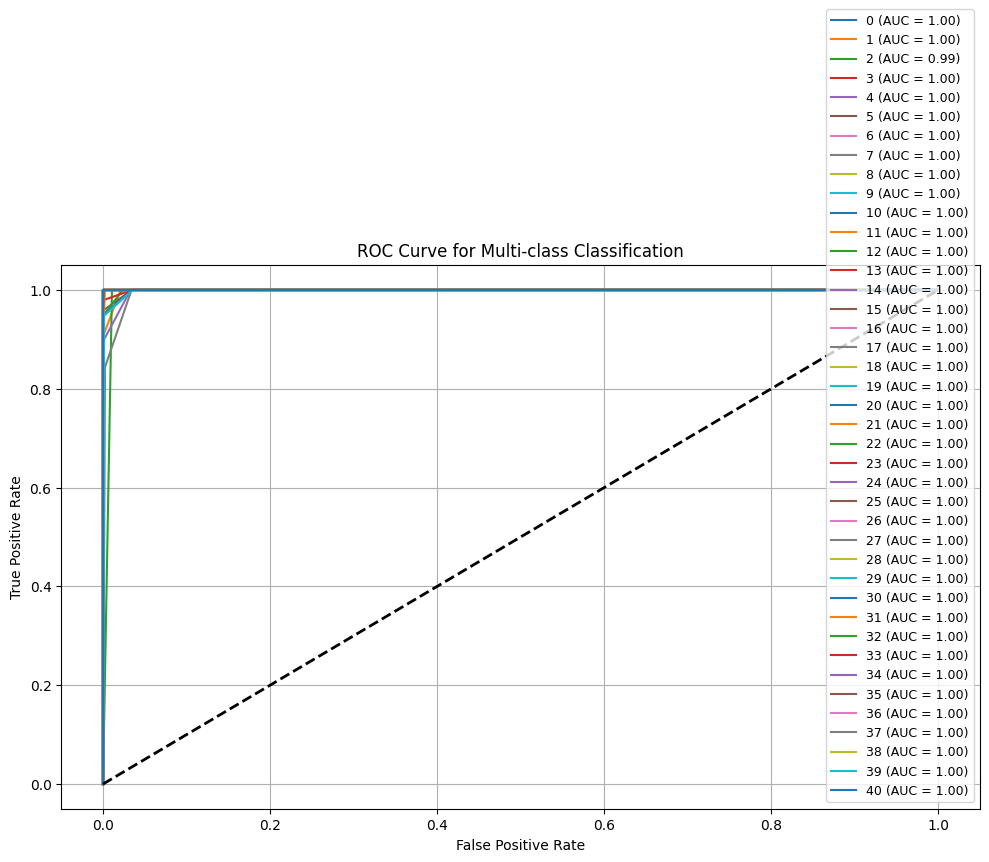


Macro-average AUC: 0.9996
Micro-average AUC: 1.0000


In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the output labels
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)
y_score = final_model.predict_proba(X_train_selected)  # Use training data here

# ROC curve per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    if y_train_binarized[:, i].sum() == 0:
        print(f"Skipping class '{lb.classes_[i]}' (no positive samples in y_train)")
        continue
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{lb.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Multi-class Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro and Micro AUC
macro_auc = roc_auc_score(y_train_binarized, y_score, average='macro')
micro_auc = roc_auc_score(y_train_binarized, y_score, average='micro')
print(f"\nMacro-average AUC: {macro_auc:.4f}")
print(f"Micro-average AUC: {micro_auc:.4f}")


✅ Part 5: Save Outputs

In [44]:
import pandas as pd

# Save AUC per class for the training dataset
auc_list = [{'Class': lb.classes_[i], 'AUC': roc_auc[i]} for i in roc_auc]
auc_df = pd.DataFrame(auc_list)

# Adding macro and micro AUC to the DataFrame
auc_df = pd.concat([
    auc_df,
    pd.DataFrame([
        {'Class': 'Macro-average', 'AUC': macro_auc},
        {'Class': 'Micro-average', 'AUC': micro_auc}
    ])
], ignore_index=True)

print("\nAUC Scores per Class (including macro/micro):")
print(auc_df)

# Save the AUC scores to a CSV file
auc_df.to_csv("AUC_Scores_training_Random.csv", index=False)
print("success!!")

# Save feature importances for the training dataset
importances.sort_values(ascending=False).to_csv("Feature_Importance_training.csv")
print("Feature importance saved as 'Feature_Importance_training.csv'")


AUC Scores per Class (including macro/micro):
            Class       AUC
0               0  1.000000
1               1  0.999011
2               2  0.994661
3               3  1.000000
4               4  0.998277
5               5  0.999278
6               6  1.000000
7               7  0.999966
8               8  1.000000
9               9  1.000000
10             10  1.000000
11             11  1.000000
12             12  0.999383
13             13  0.999634
14             14  1.000000
15             15  1.000000
16             16  1.000000
17             17  1.000000
18             18  1.000000
19             19  1.000000
20             20  1.000000
21             21  1.000000
22             22  1.000000
23             23  1.000000
24             24  1.000000
25             25  1.000000
26             26  1.000000
27             27  0.996163
28             28  1.000000
29             29  1.000000
30             30  0.999105
31             31  0.999890
32             32  1.000000
3

✅ Part 6: Make a confusion matrix

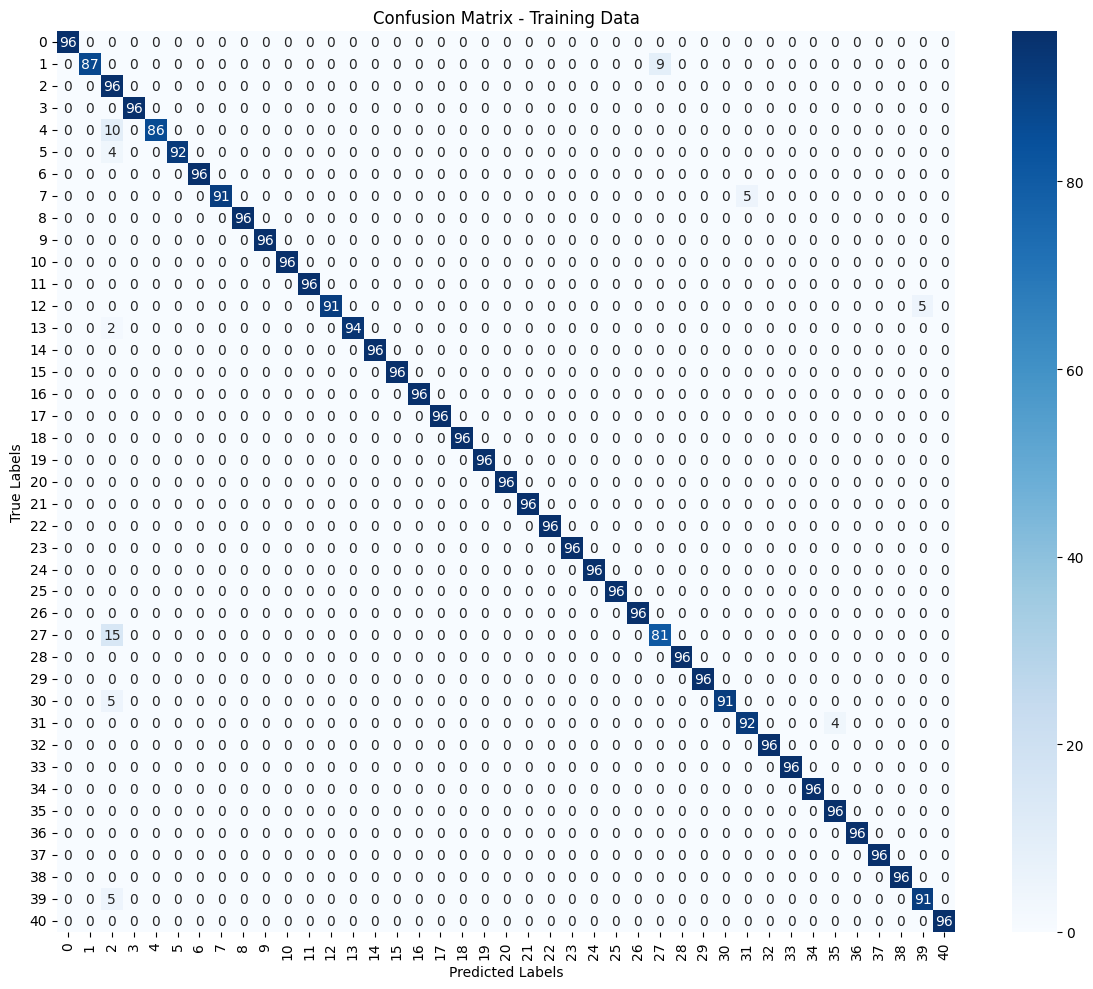

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on training data
y_train_pred = final_model.predict(X_train_selected)

# Create the confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=lb.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [51]:
importances.describe(include="all")

count    131.000000
mean       0.007634
std        0.003441
min        0.000920
25%        0.005061
50%        0.007196
75%        0.009889
max        0.019237
dtype: float64

Training our required models

our project goal requires us to train specific 6 classifier models viz.
1.kNN Classifier
2.Naive Bayes Classifier
3.Decision Tree Classifier
4.Multinomial Naive Bayes Classifier
5.SVM(Support Vector Machines)
6.Gradient Boosting Classifier

KNN CLASSIFIER

✅ Part 1: Training Model Code (Only Training Step) && Updated Training Code with Accuracy & Report

In [86]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Step 1: Compute Mutual Information scores
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)
importances = pd.Series(mi_scores, index=X_train.columns)

# Step 2: Select top-N important features
top_n = 55
top_features = importances.sort_values(ascending=False).head(top_n).index.tolist()

# Step 3: Prepare training and test data with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 4: Use GridSearchCV to find the optimal k
param_grid = {'n_neighbors': list(range(1, 21))}  # trying k from 1 to 20
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)

# Get the best k
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k found by GridSearchCV: {best_k}")

# Step 5: Train KNN with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_selected, y_train)

# Step 6: Evaluate on training data
y_train_pred = knn.predict(X_train_selected)
train_accuracy_knn = accuracy_score(y_train, y_train_pred)
print("Training Accuracy_kNN:", train_accuracy_knn)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))

# Step 7: Identify missing predicted classes
missing_classes = set(np.unique(y_train)) - set(np.unique(y_train_pred))
print("Classes not predicted by the model:", missing_classes)


Best k found by GridSearchCV: 12
Training Accuracy_kNN: 0.9857723577235772
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.95      0.96      0.95        96
           2       0.79      0.96      0.86        96
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00        96
          11       1.00      1.00      1.00        96
          12       1.00      1.00      1.00        96
          13       0.85      1.00      0.92        96
          14       1.00      1.00      1.00        96
          15       1.00     

✅Part 2: ROC Curve and AUC Evaluation 

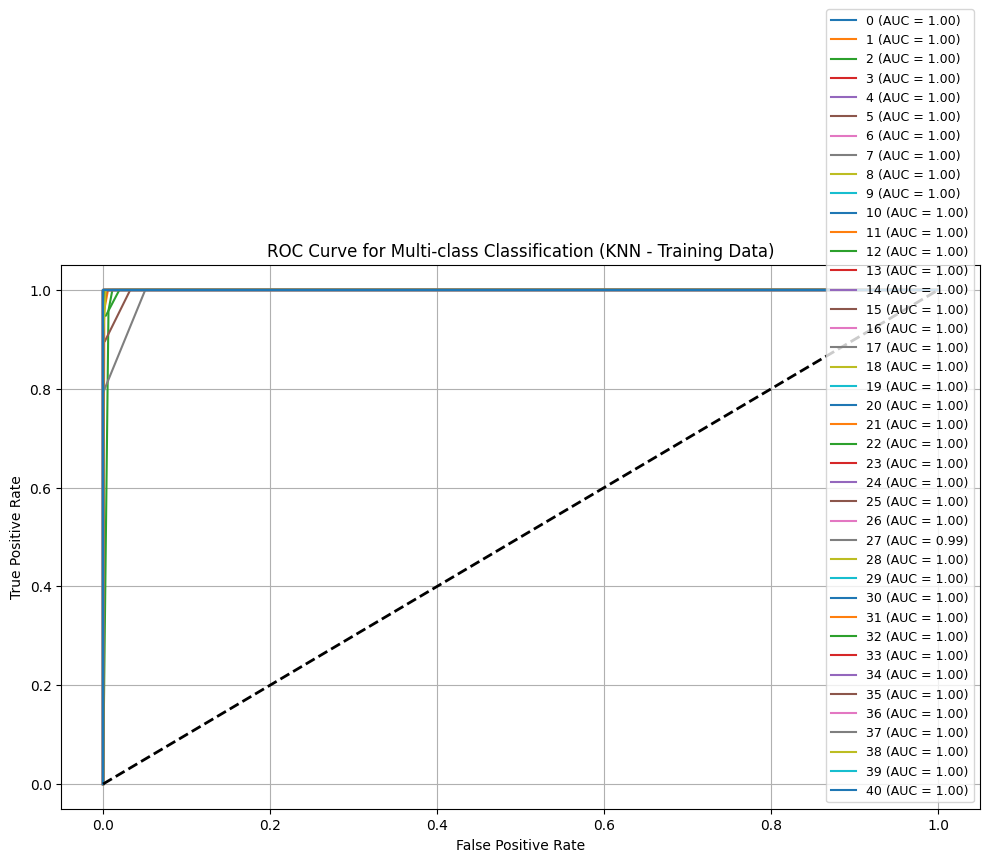


Macro-average AUC: 0.9997
Micro-average AUC: 1.0000


In [87]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the output labels
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

# Use the KNN model to predict probabilities on training data
y_score = knn.predict_proba(X_train_selected)

# ROC curve per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    if y_train_binarized[:, i].sum() == 0:
        print(f"Skipping class '{lb.classes_[i]}' (no positive samples in y_train)")
        continue
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{lb.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Multi-class Classification (KNN - Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro and Micro AUC
macro_auc = roc_auc_score(y_train_binarized, y_score, average='macro')
micro_auc = roc_auc_score(y_train_binarized, y_score, average='micro')
print(f"\nMacro-average AUC: {macro_auc:.4f}")
print(f"Micro-average AUC: {micro_auc:.4f}")


✅Part 3: Confusion Matrix

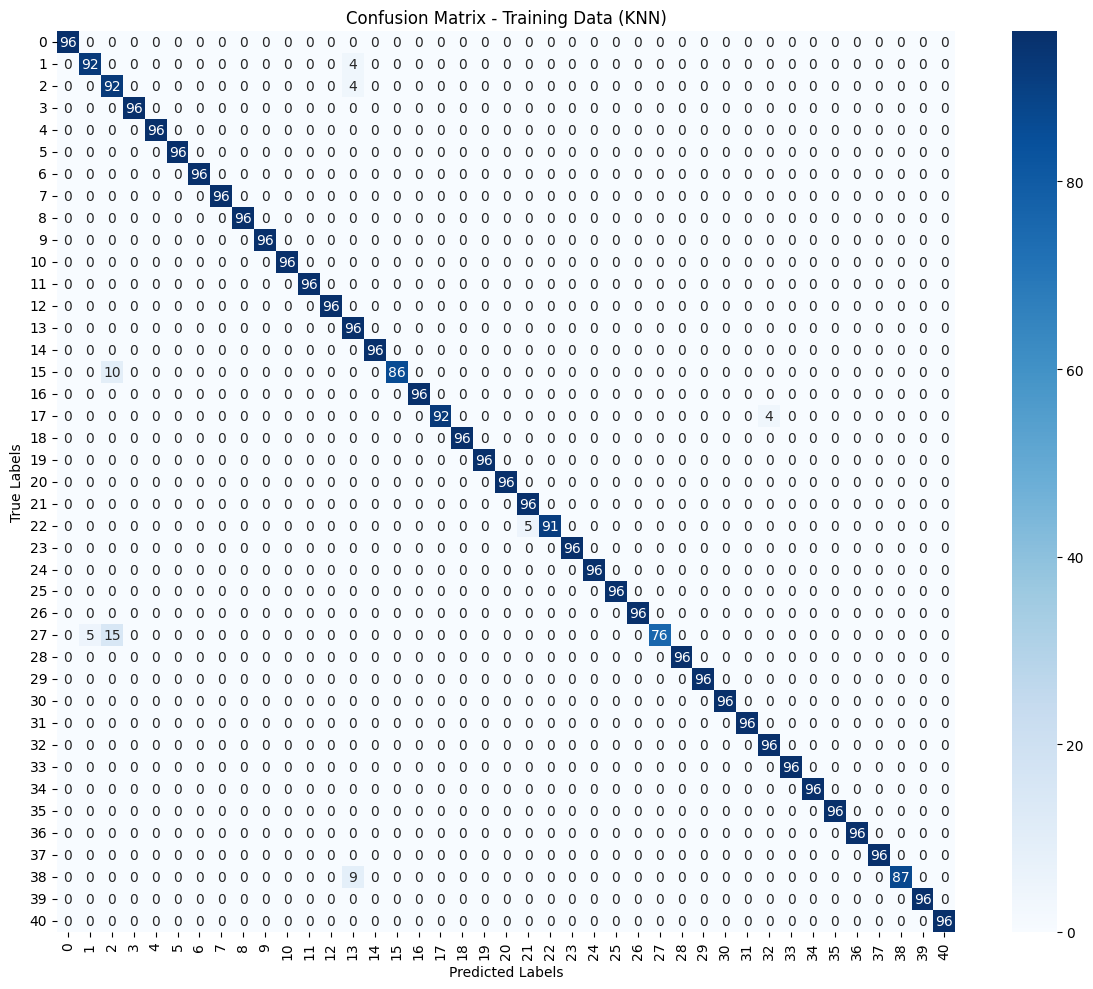

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on training data using KNN
y_train_pred = knn.predict(X_train_selected)

# Create the confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=lb.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data (KNN)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Decision tree classifier

✅ Part 1: Training Model Code (Only Training Step) && Updated Training Code with Accuracy & Report

In [89]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Calculate feature importances using Mutual Information
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)
importances = pd.Series(mi_scores, index=X_train.columns)

# Step 2: Select top-N features
top_n = 49
top_features = importances.sort_values(ascending=False).head(top_n).index.tolist()

# Step 3: Prepare training and test data with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 4: Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_selected, y_train)

# Step 5: Evaluate on training data
y_train_pred = clf.predict(X_train_selected)
train_accuracy_dt = accuracy_score(y_train, y_train_pred)
print("Training Accuracy_DT:", train_accuracy_dt)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))

# Step 6: Identify any classes not predicted
missing_classes = set(np.unique(y_train)) - set(np.unique(y_train_pred))
print("Classes not predicted by the model:", missing_classes)

Training Accuracy_DT: 0.9832317073170732
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.95      0.96      0.95        96
           2       0.76      0.96      0.85        96
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00        96
          11       1.00      1.00      1.00        96
          12       1.00      1.00      1.00        96
          13       1.00      0.95      0.97        96
          14       1.00      0.90      0.95        96
          15       0.90      0.90      0.90        96
        

✅Part 2: ROC Curve and AUC Evaluation 

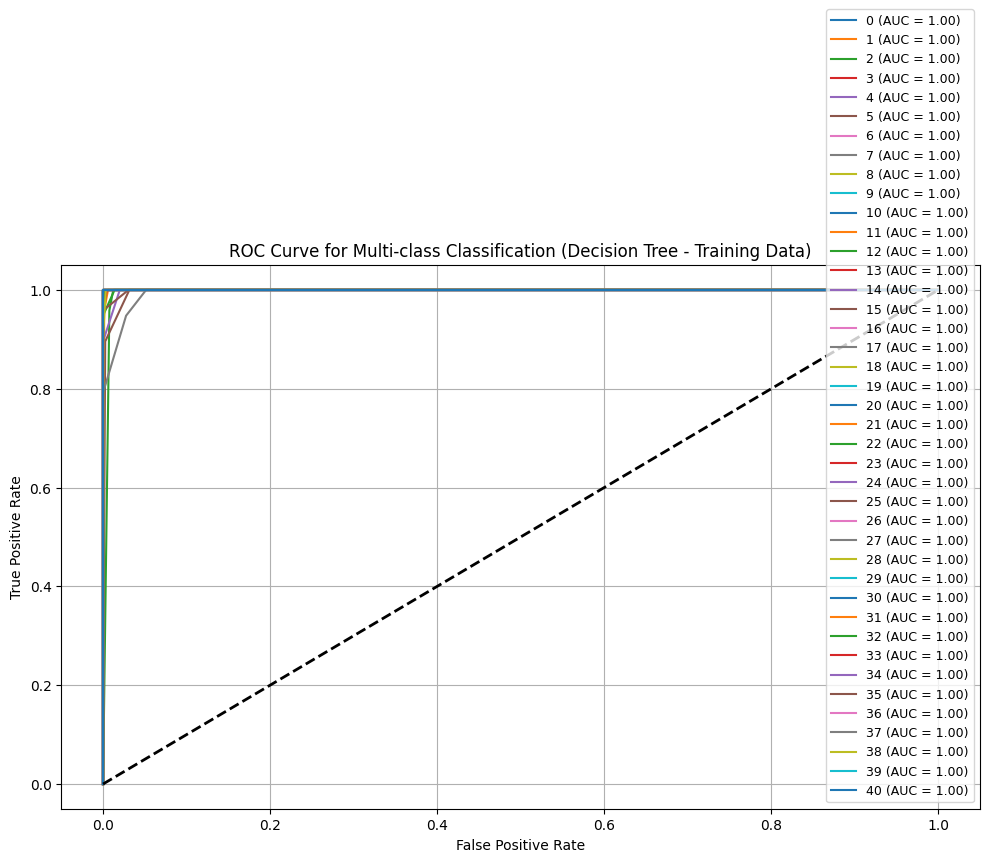


Macro-average AUC: 0.9996
Micro-average AUC: 1.0000


In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the output labels
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

# Use the Decision Tree model to predict probabilities on training data
y_score = clf.predict_proba(X_train_selected)

# ROC curve per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    if y_train_binarized[:, i].sum() == 0:
        print(f"Skipping class '{lb.classes_[i]}' (no positive samples in y_train)")
        continue
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{lb.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Multi-class Classification (Decision Tree - Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro and Micro AUC
macro_auc = roc_auc_score(y_train_binarized, y_score, average='macro')
micro_auc = roc_auc_score(y_train_binarized, y_score, average='micro')
print(f"\nMacro-average AUC: {macro_auc:.4f}")
print(f"Micro-average AUC: {micro_auc:.4f}")


✅Part 3: Confusion Matrix

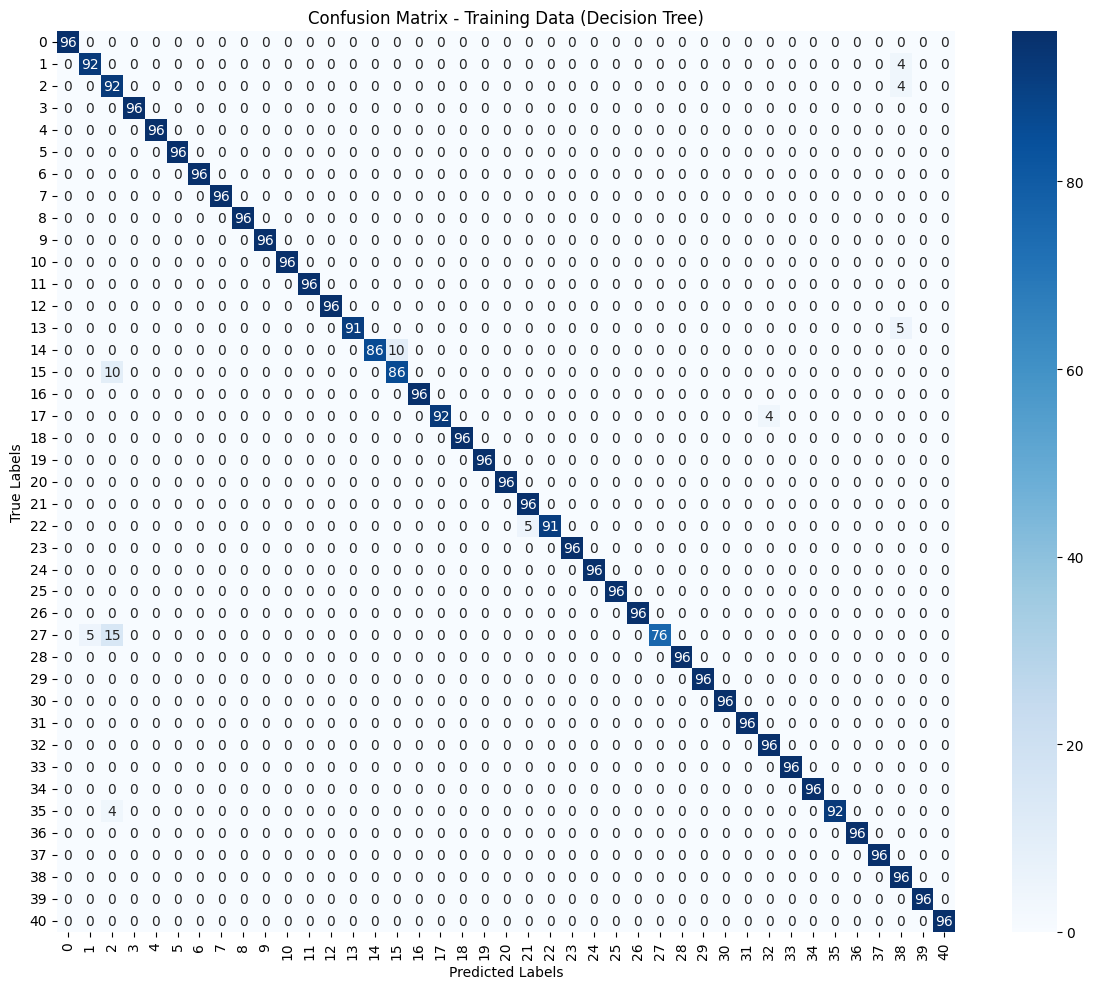

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on training data using Decision Tree
y_train_pred = clf.predict(X_train_selected)

# Create the confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=lb.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data (Decision Tree)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Naive-Bayes Classifier

✅ Part 1: Training Model Code (Only Training Step) && Updated Training Code with Accuracy & Report

In [92]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Calculate feature importances using Mutual Information
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)
importances = pd.Series(mi_scores, index=X_train.columns)

# Step 2: Select top-N features
top_n = 49
top_features = importances.sort_values(ascending=False).head(top_n).index.tolist()

# Step 3: Prepare training and test data with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 4: Train Naive Bayes Classifier (GaussianNB)
nb = GaussianNB()
nb.fit(X_train_selected, y_train)

# Step 5: Evaluate on training data
y_train_pred = nb.predict(X_train_selected)
train_accuracy_nb = accuracy_score(y_train, y_train_pred)
print("Training Accuracy_NB:", train_accuracy_nb)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))

# Step 6: Identify any classes not predicted
missing_classes = set(np.unique(y_train)) - set(np.unique(y_train_pred))
print("Classes not predicted by the model:", missing_classes)


Training Accuracy_NB: 0.9649390243902439
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.95      0.96      0.95        96
           2       0.76      0.96      0.85        96
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00        96
          11       1.00      1.00      1.00        96
          12       1.00      1.00      1.00        96
          13       1.00      0.95      0.97        96
          14       1.00      0.90      0.95        96
          15       0.90      0.90      0.90        96
        

✅Part 2: ROC Curve and AUC Evaluation 

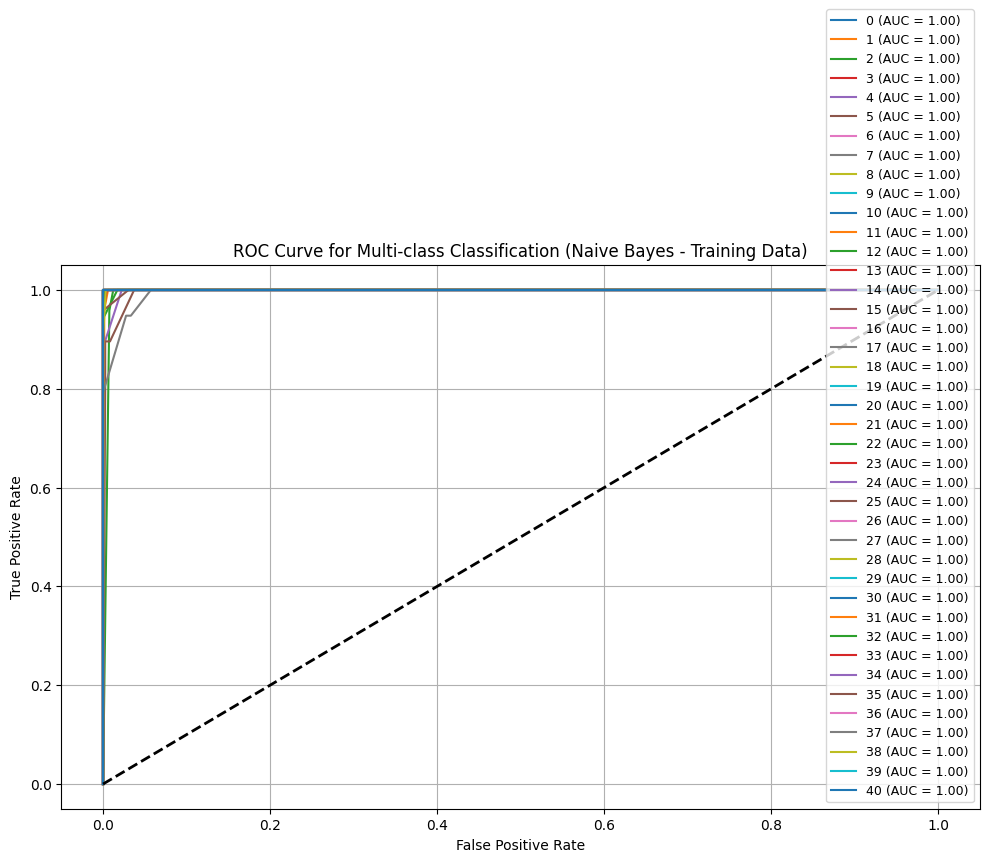


Macro-average AUC: 0.9996
Micro-average AUC: 0.9999


In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import GaussianNB

# Binarize the output labels
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

# Train the Naive Bayes model (GaussianNB)
nb = GaussianNB()
nb.fit(X_train_selected, y_train)

# Use the Naive Bayes model to predict probabilities on training data
y_score = nb.predict_proba(X_train_selected)

# ROC curve per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    if y_train_binarized[:, i].sum() == 0:
        print(f"Skipping class '{lb.classes_[i]}' (no positive samples in y_train)")
        continue
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{lb.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Multi-class Classification (Naive Bayes - Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro and Micro AUC
macro_auc = roc_auc_score(y_train_binarized, y_score, average='macro')
micro_auc = roc_auc_score(y_train_binarized, y_score, average='micro')
print(f"\nMacro-average AUC: {macro_auc:.4f}")
print(f"Micro-average AUC: {micro_auc:.4f}")


✅Part 3: Confusion Matrix

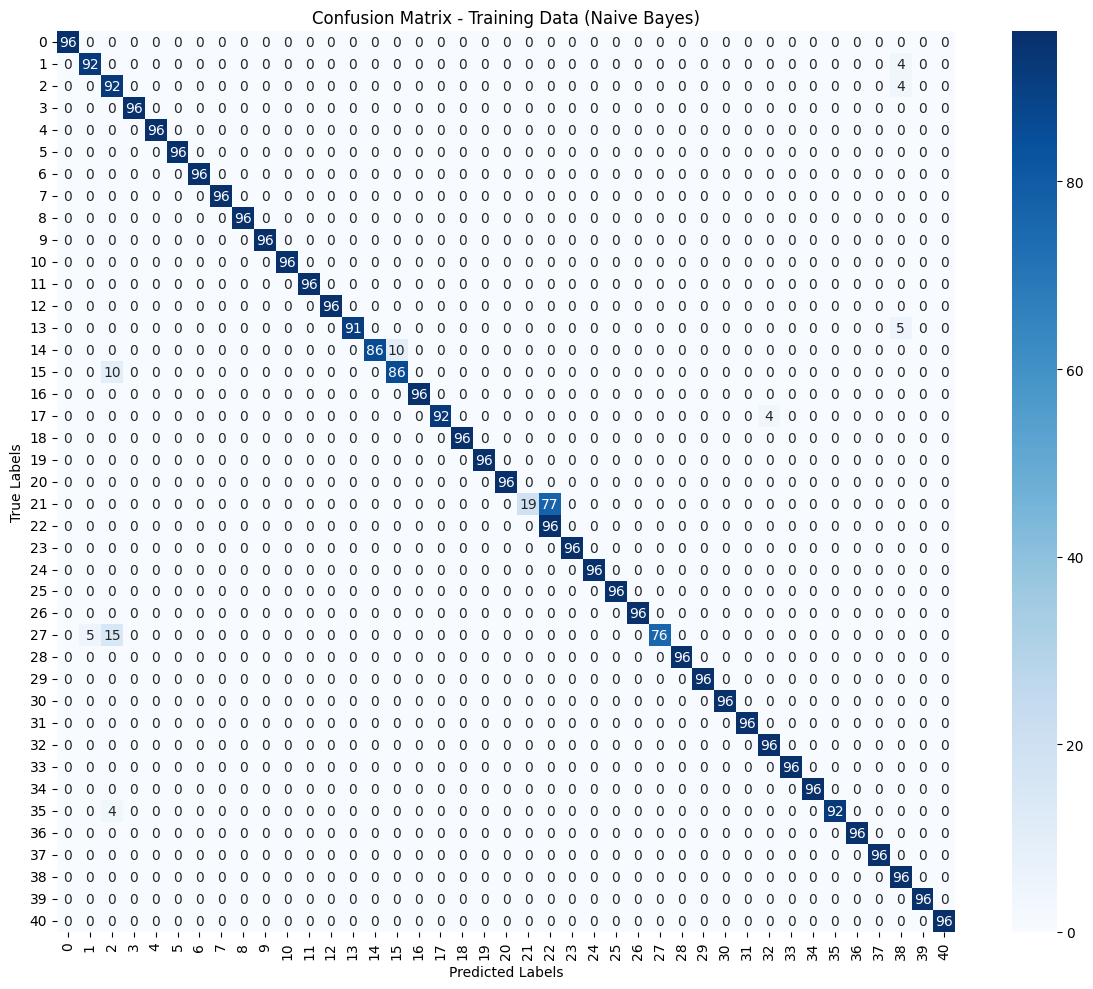

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Train the Naive Bayes model (GaussianNB)
nb = GaussianNB()
nb.fit(X_train_selected, y_train)

# Predict on training data using Naive Bayes
y_train_pred = nb.predict(X_train_selected)

# Create the confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=lb.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data (Naive Bayes)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


SVM(Support Vector Machines)

✅ Part 1: Training Model Code (Only Training Step) && Updated Training Code with Accuracy & Report

In [95]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Calculate feature importances using Mutual Information
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)
importances = pd.Series(mi_scores, index=X_train.columns)

# Step 2: Select top-N features
top_n = 49
top_features = importances.sort_values(ascending=False).head(top_n).index.tolist()

# Step 3: Prepare training and test data with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 4: Train SVM Classifier (Support Vector Machine)
svm = SVC(probability=True, random_state=42)  # Adding probability=True to use predict_proba later, if needed
svm.fit(X_train_selected, y_train)

# Step 5: Evaluate on training data
y_train_pred = svm.predict(X_train_selected)
train_accuracy_svm = accuracy_score(y_train, y_train_pred)
print("Training Accuracy_svm:", train_accuracy_svm)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))

# Step 6: Identify any classes not predicted
missing_classes = set(np.unique(y_train)) - set(np.unique(y_train_pred))
print("Classes not predicted by the model:", missing_classes)


Training Accuracy_svm: 0.9832317073170732
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.95      0.96      0.95        96
           2       0.76      0.96      0.85        96
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00        96
          11       1.00      1.00      1.00        96
          12       1.00      1.00      1.00        96
          13       1.00      0.95      0.97        96
          14       1.00      0.90      0.95        96
          15       0.90      0.90      0.90        96
       

✅Part 2: ROC Curve and AUC Evaluation 

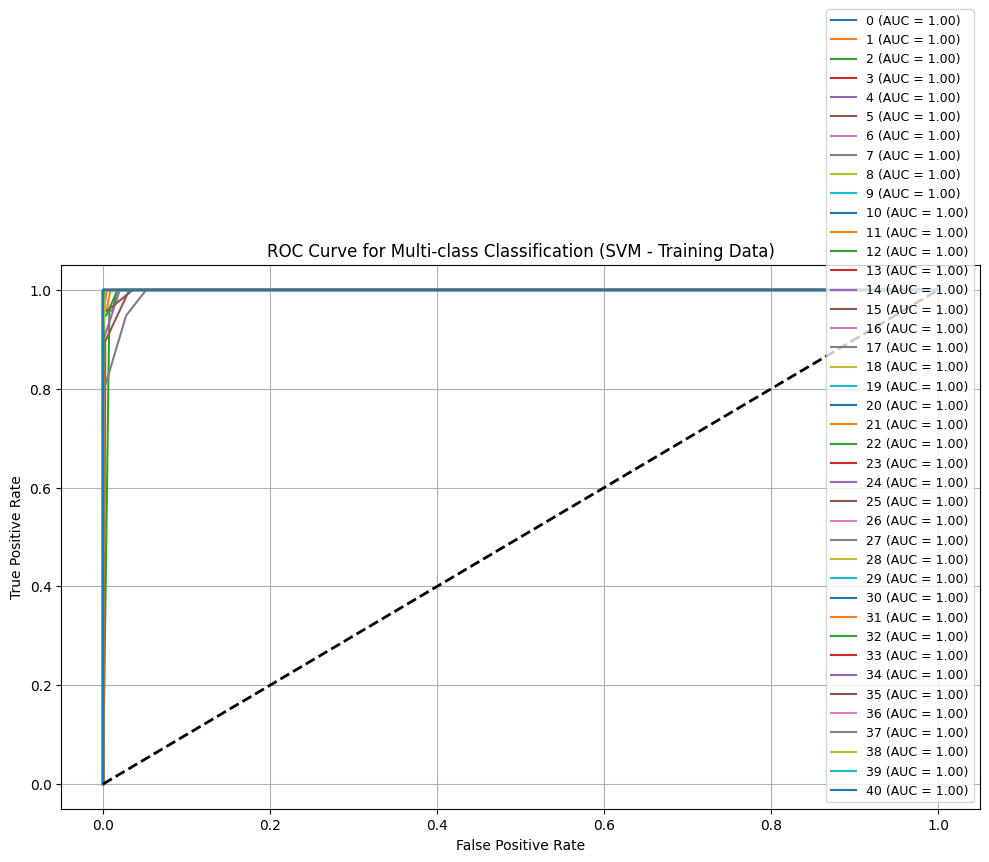


Macro-average AUC: 0.9996
Micro-average AUC: 0.9998


In [96]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC

# Binarize the output labels
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

# Train the SVM model (Support Vector Machine)
svm = SVC(probability=True, random_state=42)  # probability=True to use predict_proba
svm.fit(X_train_selected, y_train)

# Use the SVM model to predict probabilities on training data
y_score = svm.predict_proba(X_train_selected)

# ROC curve per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    if y_train_binarized[:, i].sum() == 0:
        print(f"Skipping class '{lb.classes_[i]}' (no positive samples in y_train)")
        continue
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{lb.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Multi-class Classification (SVM - Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro and Micro AUC
macro_auc = roc_auc_score(y_train_binarized, y_score, average='macro')
micro_auc = roc_auc_score(y_train_binarized, y_score, average='micro')
print(f"\nMacro-average AUC: {macro_auc:.4f}")
print(f"Micro-average AUC: {micro_auc:.4f}")


✅Part 3: Confusion Matrix

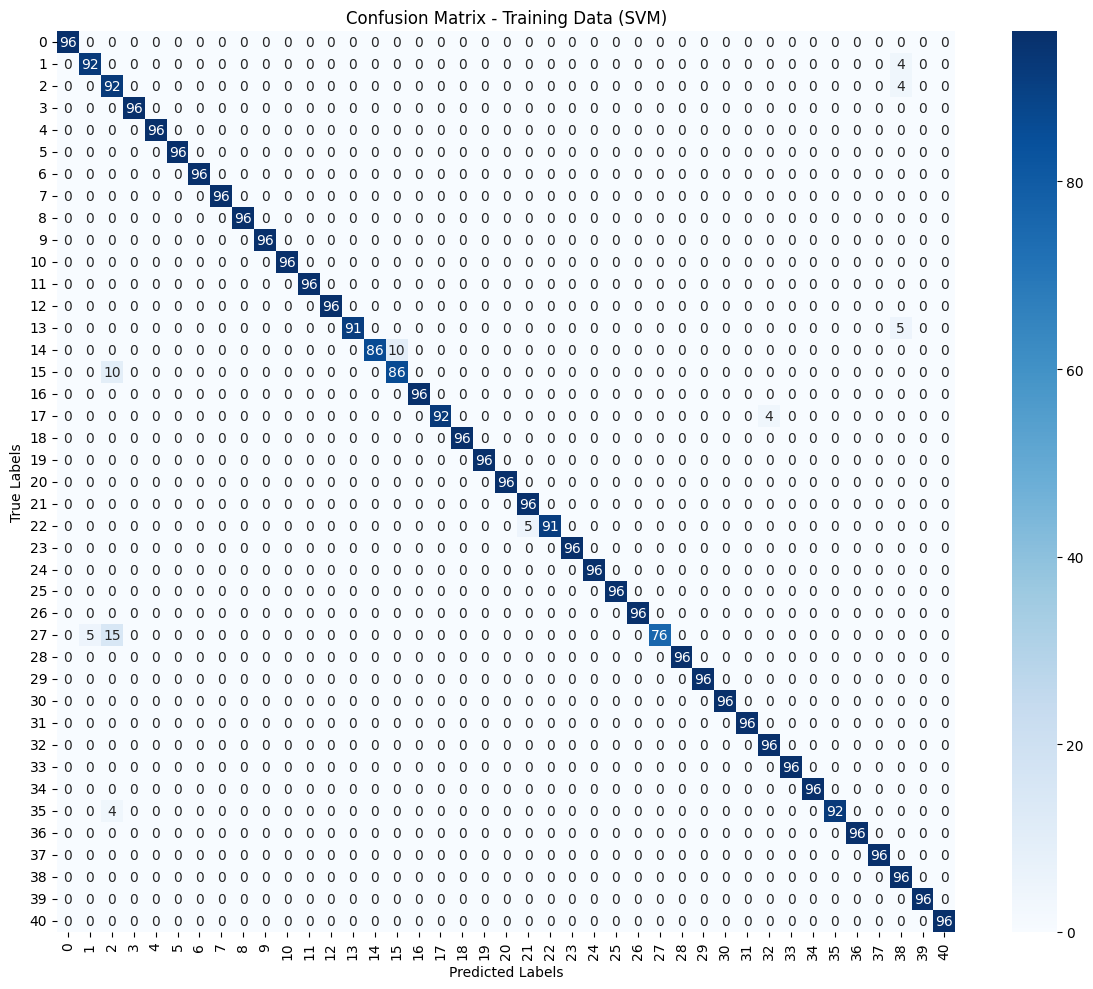

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer

# Binarize the output labels (for multi-class classification)
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

# Train the SVM model (Support Vector Machine)
svm = SVC(probability=True, random_state=42)  # probability=True for using predict_proba
svm.fit(X_train_selected, y_train)

# Predict on training data using SVM
y_train_pred = svm.predict(X_train_selected)

# Create the confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=lb.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data (SVM)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Gradient Boosting

✅ Part 1: Training Model Code (Only Training Step) && Updated Training Code with Accuracy & Report

In [98]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier  # Importing Gradient Boosting Classifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Calculate feature importances using Mutual Information
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)
importances = pd.Series(mi_scores, index=X_train.columns)

# Step 2: Select top-N features
top_n = 49
top_features = importances.sort_values(ascending=False).head(top_n).index.tolist()

# Step 3: Prepare training and test data with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 4: Train Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)  # Using GradientBoostingClassifier
gb.fit(X_train_selected, y_train)

# Step 5: Evaluate on training data
y_train_pred = gb.predict(X_train_selected)
train_accuracy_gb = accuracy_score(y_train, y_train_pred)
print("Training Accuracy_gb :", train_accuracy_gb)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))

# Step 6: Identify any classes not predicted
missing_classes = set(np.unique(y_train)) - set(np.unique(y_train_pred))
print("Classes not predicted by the model:", missing_classes)


Training Accuracy_gb : 0.9832317073170732
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.95      0.96      0.95        96
           2       0.76      0.96      0.85        96
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00        96
          11       1.00      1.00      1.00        96
          12       1.00      1.00      1.00        96
          13       1.00      0.95      0.97        96
          14       1.00      0.90      0.95        96
          15       0.90      0.90      0.90        96
       

✅Part 2: ROC Curve and AUC Evaluation

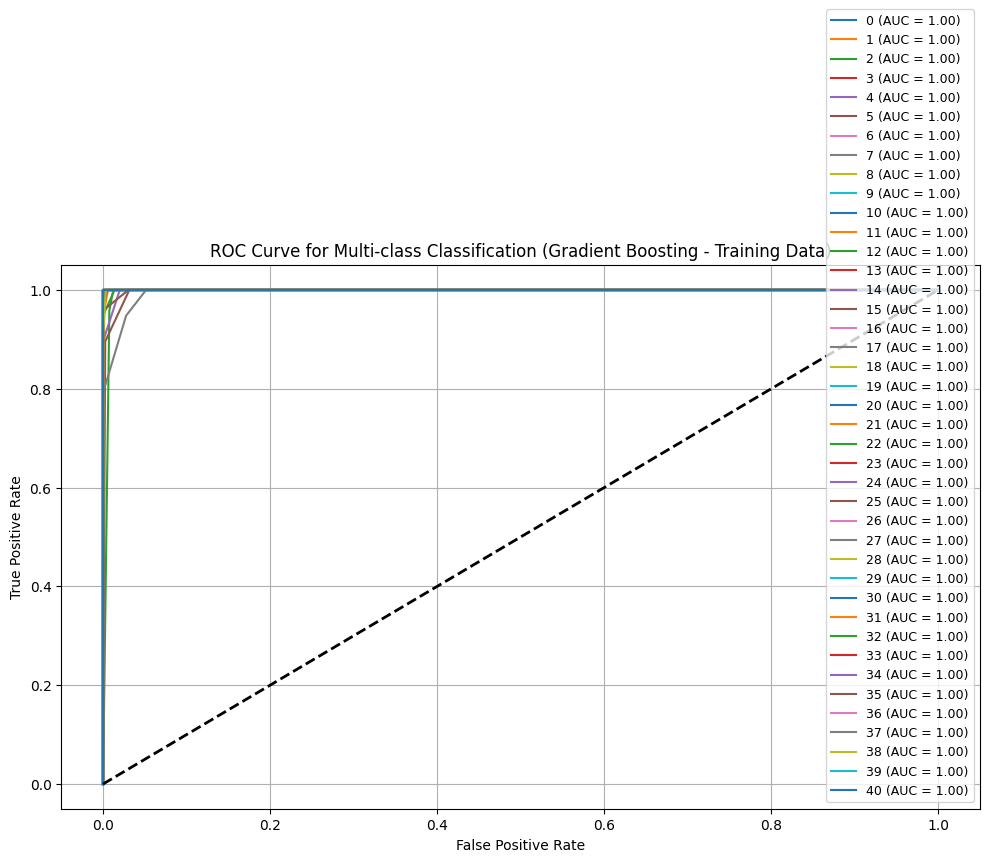


Macro-average AUC: 0.9996
Micro-average AUC: 1.0000


In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import GradientBoostingClassifier

# Binarize the output labels
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

# Train the Gradient Boosting Classifier model
gb = GradientBoostingClassifier(random_state=42)  # Using GradientBoostingClassifier
gb.fit(X_train_selected, y_train)

# Use the Gradient Boosting model to predict probabilities on training data
y_score = gb.predict_proba(X_train_selected)

# ROC curve per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    if y_train_binarized[:, i].sum() == 0:
        print(f"Skipping class '{lb.classes_[i]}' (no positive samples in y_train)")
        continue
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{lb.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Multi-class Classification (Gradient Boosting - Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro and Micro AUC
macro_auc = roc_auc_score(y_train_binarized, y_score, average='macro')
micro_auc = roc_auc_score(y_train_binarized, y_score, average='micro')
print(f"\nMacro-average AUC: {macro_auc:.4f}")
print(f"Micro-average AUC: {micro_auc:.4f}")


✅Part 3: Confusion Matrix

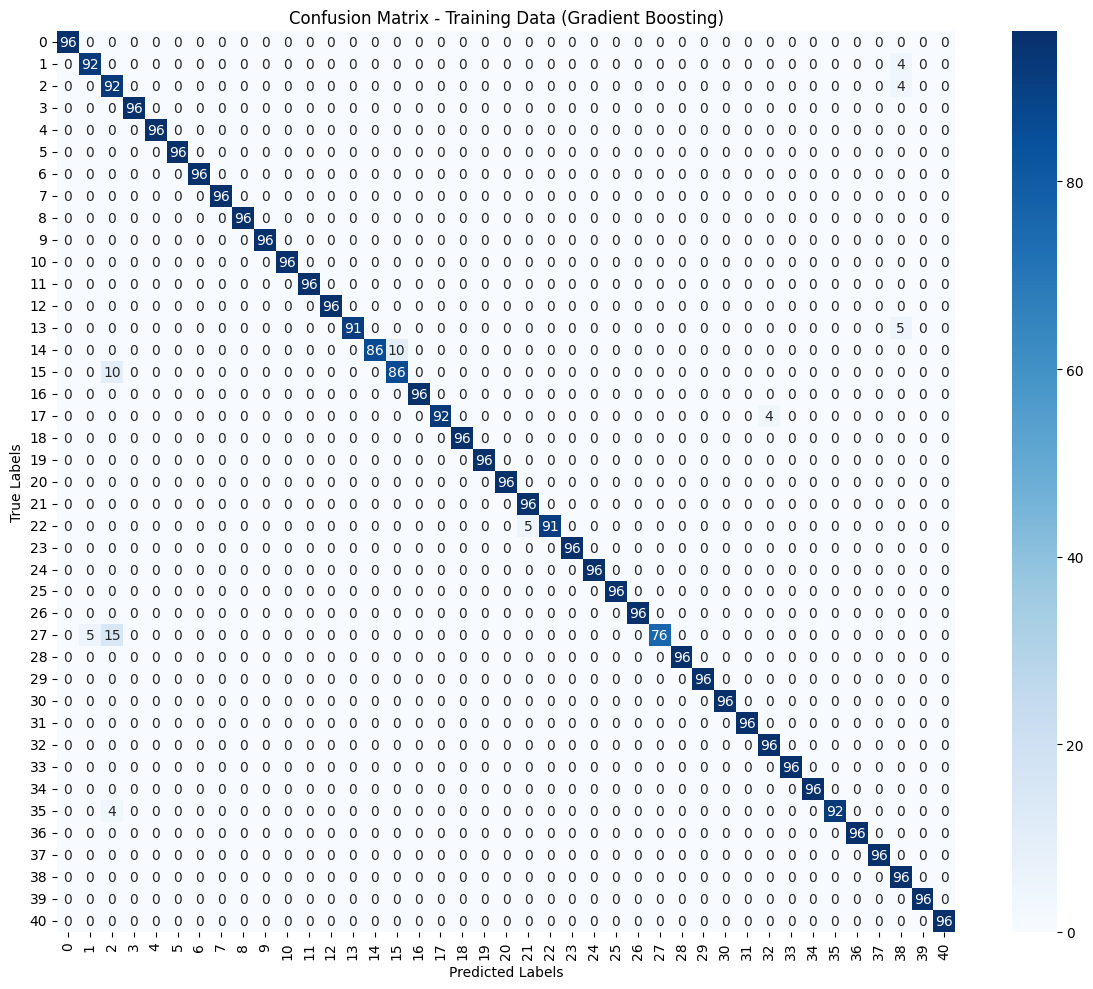

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelBinarizer

# Binarize the output labels (for multi-class classification)
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

# Train the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_selected, y_train)

# Predict on training data using Gradient Boosting
y_train_pred = gb.predict(X_train_selected)

# Create the confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=lb.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data (Gradient Boosting)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Multinomial Naive Bayes 

✅ Part 1: Training Model Code (Only Training Step) && Updated Training Code with Accuracy & Report

In [101]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Calculate feature importances using Mutual Information
mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)
importances = pd.Series(mi_scores, index=X_train.columns)

# Step 2: Select top-N features
top_n = 49
top_features = importances.sort_values(ascending=False).head(top_n).index.tolist()

# Step 3: Prepare training and test data with selected features
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Step 4: Train Multinomial Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train_selected, y_train)

# Step 5: Evaluate on training data
y_train_pred = mnb.predict(X_train_selected)
train_accuracy_mnb = accuracy_score(y_train, y_train_pred)
print("Training Accuracy_Mnb :", train_accuracy_mnb)
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=0))

# Step 6: Identify any classes not predicted
missing_classes = set(np.unique(y_train)) - set(np.unique(y_train_pred))
print("Classes not predicted by the model:", missing_classes)


Training Accuracy_Mnb : 0.9809451219512195
Training Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        96
           1       0.95      0.96      0.95        96
           2       0.76      0.96      0.85        96
           3       1.00      1.00      1.00        96
           4       1.00      1.00      1.00        96
           5       1.00      1.00      1.00        96
           6       1.00      1.00      1.00        96
           7       1.00      1.00      1.00        96
           8       1.00      1.00      1.00        96
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00        96
          11       1.00      1.00      1.00        96
          12       1.00      1.00      1.00        96
          13       1.00      0.95      0.97        96
          14       1.00      0.90      0.95        96
          15       0.90      0.90      0.90        96
      

✅Part 2: ROC Curve and AUC Evaluation

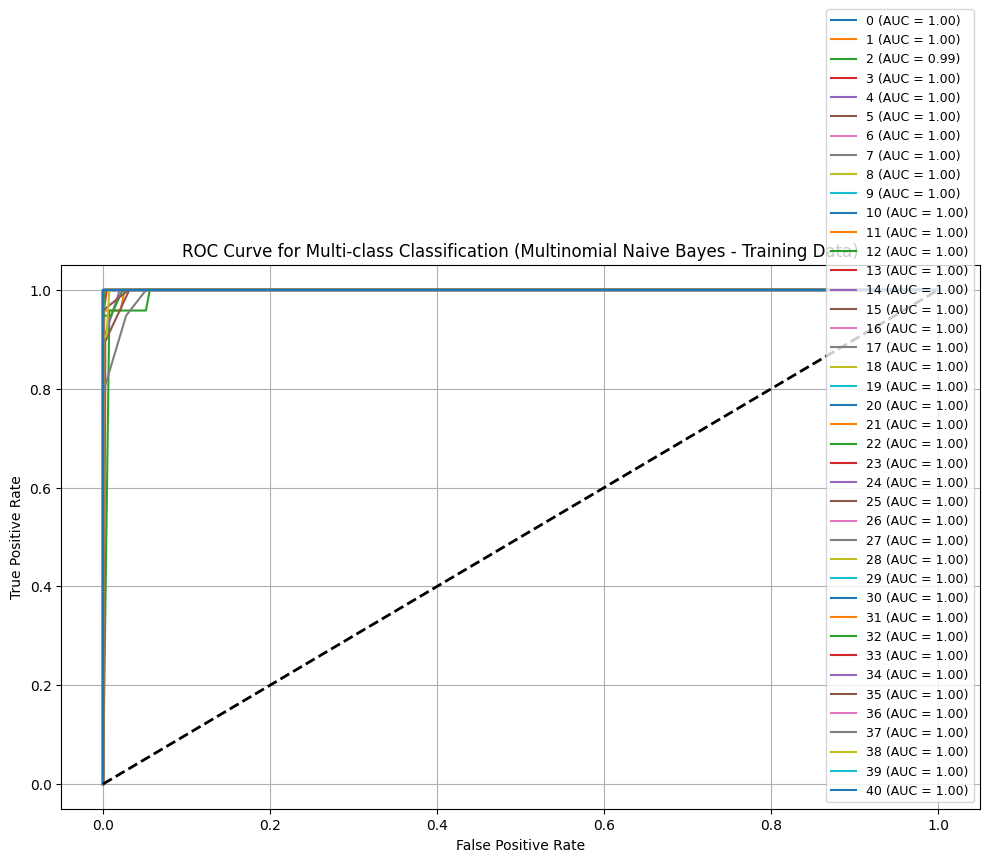


Macro-average AUC: 0.9995
Micro-average AUC: 0.9997


In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB

# Binarize the output labels
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

# Train the Multinomial Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train_selected, y_train)

# Use the Multinomial Naive Bayes model to predict probabilities on training data
y_score = mnb.predict_proba(X_train_selected)

# ROC curve per class
fpr, tpr, roc_auc = {}, {}, {}
plt.figure(figsize=(10, 8))

for i in range(len(lb.classes_)):
    if y_train_binarized[:, i].sum() == 0:
        print(f"Skipping class '{lb.classes_[i]}' (no positive samples in y_train)")
        continue
    fpr[i], tpr[i], _ = roc_curve(y_train_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"{lb.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.title('ROC Curve for Multi-class Classification (Multinomial Naive Bayes - Training Data)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()

# Macro and Micro AUC
macro_auc = roc_auc_score(y_train_binarized, y_score, average='macro')
micro_auc = roc_auc_score(y_train_binarized, y_score, average='micro')
print(f"\nMacro-average AUC: {macro_auc:.4f}")
print(f"Micro-average AUC: {micro_auc:.4f}")


✅Part 3: Confusion Matrix

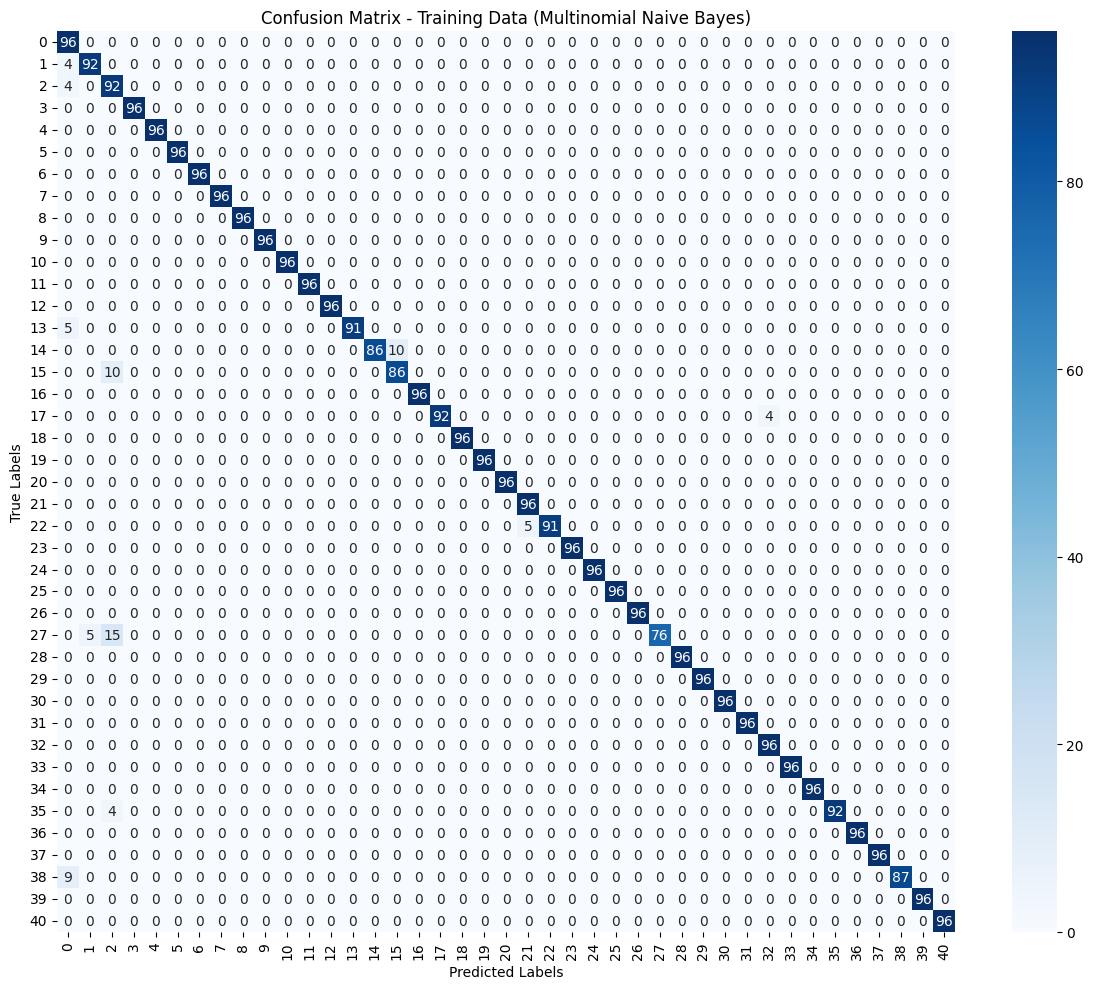

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelBinarizer

# Binarize the output labels (for multi-class classification)
lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(y_train)

# Train the Multinomial Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train_selected, y_train)

# Predict on training data using Multinomial Naive Bayes
y_train_pred = mnb.predict(X_train_selected)

# Create the confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=lb.classes_)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Training Data (Multinomial Naive Bayes)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Training Accuracy Comparison:
kNN: 0.9858
Naive Bayes: 0.9649
Decision Tree: 0.9832
MultinomialNB: 0.9809
SVM: 0.9832
Gradient Boosting: 0.9832


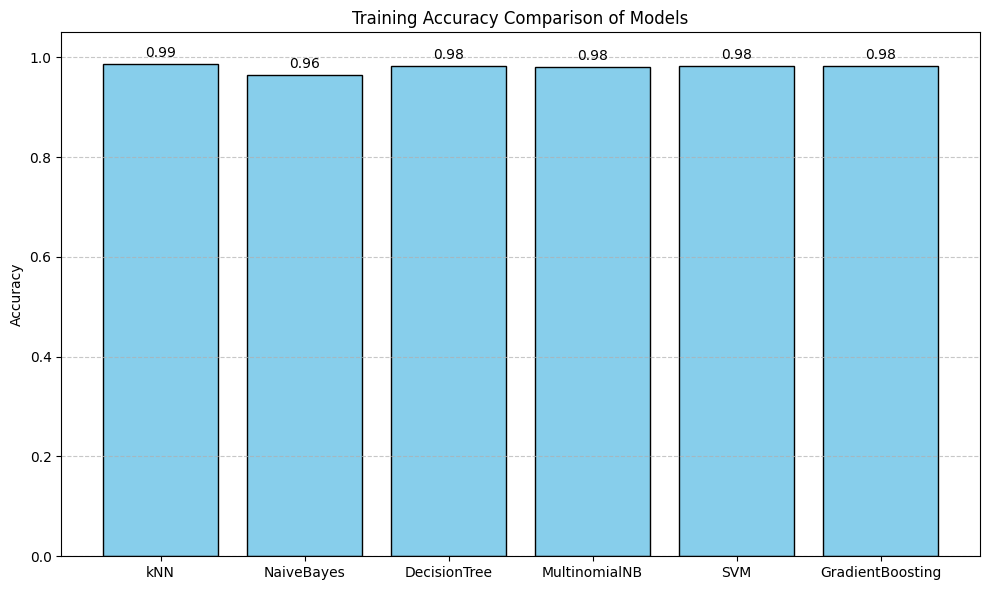

In [104]:
import matplotlib.pyplot as plt

# Store training accuracies from each model (ensure these match your earlier variable assignments)
Training_Accuracy_kNN = train_accuracy_knn       # from final kNN block
Training_Accuracy_NB = train_accuracy_nb         # from GaussianNB
Training_Accuracy_DT = train_accuracy_dt         # from DecisionTreeClassifier
Training_Accuracy_Mnb = train_accuracy_mnb       # from MultinomialNB
Training_Accuracy_svm = train_accuracy_svm       # from SVM
Training_Accuracy_gb = train_accuracy_gb         # from Gradient Boosting

# 1. Print accuracy values
print("Training Accuracy Comparison:")
print(f"kNN: {Training_Accuracy_kNN:.4f}")
print(f"Naive Bayes: {Training_Accuracy_NB:.4f}")
print(f"Decision Tree: {Training_Accuracy_DT:.4f}")
print(f"MultinomialNB: {Training_Accuracy_Mnb:.4f}")
print(f"SVM: {Training_Accuracy_svm:.4f}")
print(f"Gradient Boosting: {Training_Accuracy_gb:.4f}")

# 2. Barplot of training accuracies
models = ['kNN', 'NaiveBayes', 'DecisionTree', 'MultinomialNB', 'SVM', 'GradientBoosting']
accuracies = [
    Training_Accuracy_kNN,
    Training_Accuracy_NB,
    Training_Accuracy_DT,
    Training_Accuracy_Mnb,
    Training_Accuracy_svm,
    Training_Accuracy_gb
]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')
plt.ylim(0, 1.05)
plt.title('Training Accuracy Comparison of Models')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with accuracy values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords='offset points', ha='center', fontsize=10)

plt.tight_layout()
plt.show()




Testing dataset

KNN:

In [106]:
# Step 6: Evaluate on test data (aligned features between train and test)
y_test_pred = knn.predict(X_test_selected)  # Predict on the test data

# Now it's safe to use y_test_pred
length_of_predictions = len(y_test_pred)
print(f"Length of test predictions: {length_of_predictions}")

test_accuracy_knn = accuracy_score(y_test, y_test_pred)
print("Test Accuracy_kNN:", test_accuracy_knn)

# Step 7: Print classification report for the test data
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Step 8: Identify any classes not predicted in the test set
missing_test_classes = set(np.unique(y_test)) - set(np.unique(y_test_pred))
print("Classes not predicted in test data:", missing_test_classes)


Length of test predictions: 984
Test Accuracy_kNN: 0.9817073170731707
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.96      0.92      0.94        24
           2       0.76      0.92      0.83        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      0.96      0.98        24
          14       1.00      0.92      0.96        24
          15       0.92      0.92    

Decision tree

In [107]:
# Step: Evaluate on test data
y_test_pred = clf.predict(X_test_selected)
test_accuracy_dt = accuracy_score(y_test, y_test_pred)
print("Test Accuracy_DT:", test_accuracy_dt)
# Print the length of the test predictions
length_of_predictions2 = len(y_test_pred)
print(f"Length of test predictions: {length_of_predictions2}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Identify any classes not predicted in the test set
missing_test_classes = set(np.unique(y_test)) - set(np.unique(y_test_pred))
print("Classes not predicted in test data:", missing_test_classes)


Test Accuracy_DT: 0.9817073170731707
Length of test predictions: 984
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.96      0.92      0.94        24
           2       0.76      0.92      0.83        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      0.96      0.98        24
          14       1.00      0.92      0.96        24
          15       0.92      0.92     

Naive Bayes

In [108]:
# Step: Evaluate on test data
y_test_pred = nb.predict(X_test_selected)
test_accuracy_nb = accuracy_score(y_test, y_test_pred)
print("Test Accuracy_NB:", test_accuracy_nb)

# Store the length of test predictions in a variable
length_of_predictions3 = len(y_test_pred)

# Print the variable containing the length of test predictions
print(f"Length of test predictions: {length_of_predictions3}")

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Identify any classes not predicted in the test set
missing_test_classes = set(np.unique(y_test)) - set(np.unique(y_test_pred))
print("Classes not predicted in test data:", missing_test_classes)


Test Accuracy_NB: 0.9634146341463414
Length of test predictions: 984
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.96      0.92      0.94        24
           2       0.76      0.92      0.83        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      0.96      0.98        24
          14       1.00      0.92      0.96        24
          15       0.92      0.92     

SVM

In [109]:
# Step: Evaluate on test data
y_test_pred = svm.predict(X_test_selected)
test_accuracy_svm = accuracy_score(y_test, y_test_pred)
print("Test Accuracy_svm:", test_accuracy_svm)

# Store the length of test predictions in a variable
length_of_predictions4 = len(y_test_pred)

# Print the variable containing the length of test predictions
print(f"Length of test predictions: {length_of_predictions4}")

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Identify any classes not predicted in the test set
missing_test_classes = set(np.unique(y_test)) - set(np.unique(y_test_pred))
print("Classes not predicted in test data:", missing_test_classes)


Test Accuracy_svm: 0.9817073170731707
Length of test predictions: 984
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.96      0.92      0.94        24
           2       0.76      0.92      0.83        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      0.96      0.98        24
          14       1.00      0.92      0.96        24
          15       0.92      0.92    

Gradient Boosting

In [110]:
# Step: Evaluate on test data
y_test_pred = gb.predict(X_test_selected)
test_accuracy_gb = accuracy_score(y_test, y_test_pred)
print("Test Accuracy_gb:", test_accuracy_gb)

# Store the length of test predictions in a variable
length_of_predictions5 = len(y_test_pred)

# Print the variable containing the length of test predictions
print(f"Length of test predictions: {length_of_predictions5}")

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Identify any classes not predicted in the test set
missing_classes_test = set(np.unique(y_test)) - set(np.unique(y_test_pred))
print("Classes not predicted in test data:", missing_classes_test)


Test Accuracy_gb: 0.9817073170731707
Length of test predictions: 984
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.96      0.92      0.94        24
           2       0.76      0.92      0.83        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      0.96      0.98        24
          14       1.00      0.92      0.96        24
          15       0.92      0.92     

Multinomial Naive Bayes

In [111]:
# Step: Evaluate on test data
y_test_pred = mnb.predict(X_test_selected)
test_accuracy_mnb = accuracy_score(y_test, y_test_pred)
print("Test Accuracy_Mnb:", test_accuracy_mnb)

# Store the length of test predictions in a variable
length_of_predictions6 = len(y_test_pred)

# Print the variable containing the length of test predictions
print(f"Length of test predictions: {length_of_predictions6}")

print("Test Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=0))

# Identify any classes not predicted in the test set
missing_classes_test = set(np.unique(y_test)) - set(np.unique(y_test_pred))
print("Classes not predicted in test data:", missing_classes_test)


Test Accuracy_Mnb: 0.9786585365853658
Length of test predictions: 984
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        24
           1       0.96      0.92      0.94        24
           2       0.76      0.92      0.83        24
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        24
           8       1.00      1.00      1.00        24
           9       1.00      1.00      1.00        24
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        24
          13       1.00      0.96      0.98        24
          14       1.00      0.92      0.96        24
          15       0.92      0.92    

In [112]:
# Assuming y_test_pred is the prediction from the Naive Bayes model
predictions = y_test_pred
predictions2 = y_test_pred
predictions3 = y_test_pred
predictions4 = y_test_pred
predictions5 = y_test_pred
predictions6 = y_test_pred

# Now you can use the sum function with zip
print(sum(1 for i, j, k, l, m, n in zip(predictions, predictions2, predictions3, predictions4, predictions5, predictions6) if i == j == k == l == m == n))


984


In [113]:
unique,counts=np.unique(predictions,return_counts=True)
dict(zip(unique,counts))

{0: 32,
 1: 23,
 2: 29,
 3: 24,
 4: 24,
 5: 24,
 6: 24,
 7: 24,
 8: 24,
 9: 24,
 10: 24,
 11: 24,
 12: 24,
 13: 23,
 14: 22,
 15: 24,
 16: 24,
 17: 22,
 18: 24,
 19: 24,
 20: 24,
 21: 25,
 22: 23,
 23: 24,
 24: 24,
 25: 24,
 26: 24,
 27: 20,
 28: 24,
 29: 24,
 30: 24,
 31: 24,
 32: 26,
 33: 24,
 34: 24,
 35: 22,
 36: 24,
 37: 24,
 38: 21,
 39: 24,
 40: 24}

In [114]:
unique,counts=np.unique(predictions2,return_counts=True)
dict(zip(unique,counts))

{0: 32,
 1: 23,
 2: 29,
 3: 24,
 4: 24,
 5: 24,
 6: 24,
 7: 24,
 8: 24,
 9: 24,
 10: 24,
 11: 24,
 12: 24,
 13: 23,
 14: 22,
 15: 24,
 16: 24,
 17: 22,
 18: 24,
 19: 24,
 20: 24,
 21: 25,
 22: 23,
 23: 24,
 24: 24,
 25: 24,
 26: 24,
 27: 20,
 28: 24,
 29: 24,
 30: 24,
 31: 24,
 32: 26,
 33: 24,
 34: 24,
 35: 22,
 36: 24,
 37: 24,
 38: 21,
 39: 24,
 40: 24}

In [115]:
unique,counts=np.unique(predictions3,return_counts=True)
dict(zip(unique,counts))

{0: 32,
 1: 23,
 2: 29,
 3: 24,
 4: 24,
 5: 24,
 6: 24,
 7: 24,
 8: 24,
 9: 24,
 10: 24,
 11: 24,
 12: 24,
 13: 23,
 14: 22,
 15: 24,
 16: 24,
 17: 22,
 18: 24,
 19: 24,
 20: 24,
 21: 25,
 22: 23,
 23: 24,
 24: 24,
 25: 24,
 26: 24,
 27: 20,
 28: 24,
 29: 24,
 30: 24,
 31: 24,
 32: 26,
 33: 24,
 34: 24,
 35: 22,
 36: 24,
 37: 24,
 38: 21,
 39: 24,
 40: 24}

In [116]:
unique,counts=np.unique(predictions4,return_counts=True)
dict(zip(unique,counts))

{0: 32,
 1: 23,
 2: 29,
 3: 24,
 4: 24,
 5: 24,
 6: 24,
 7: 24,
 8: 24,
 9: 24,
 10: 24,
 11: 24,
 12: 24,
 13: 23,
 14: 22,
 15: 24,
 16: 24,
 17: 22,
 18: 24,
 19: 24,
 20: 24,
 21: 25,
 22: 23,
 23: 24,
 24: 24,
 25: 24,
 26: 24,
 27: 20,
 28: 24,
 29: 24,
 30: 24,
 31: 24,
 32: 26,
 33: 24,
 34: 24,
 35: 22,
 36: 24,
 37: 24,
 38: 21,
 39: 24,
 40: 24}

In [117]:
unique,counts=np.unique(predictions5,return_counts=True)
dict(zip(unique,counts))

{0: 32,
 1: 23,
 2: 29,
 3: 24,
 4: 24,
 5: 24,
 6: 24,
 7: 24,
 8: 24,
 9: 24,
 10: 24,
 11: 24,
 12: 24,
 13: 23,
 14: 22,
 15: 24,
 16: 24,
 17: 22,
 18: 24,
 19: 24,
 20: 24,
 21: 25,
 22: 23,
 23: 24,
 24: 24,
 25: 24,
 26: 24,
 27: 20,
 28: 24,
 29: 24,
 30: 24,
 31: 24,
 32: 26,
 33: 24,
 34: 24,
 35: 22,
 36: 24,
 37: 24,
 38: 21,
 39: 24,
 40: 24}

In [118]:
unique,counts=np.unique(predictions6,return_counts=True)
dict(zip(unique,counts))

{0: 32,
 1: 23,
 2: 29,
 3: 24,
 4: 24,
 5: 24,
 6: 24,
 7: 24,
 8: 24,
 9: 24,
 10: 24,
 11: 24,
 12: 24,
 13: 23,
 14: 22,
 15: 24,
 16: 24,
 17: 22,
 18: 24,
 19: 24,
 20: 24,
 21: 25,
 22: 23,
 23: 24,
 24: 24,
 25: 24,
 26: 24,
 27: 20,
 28: 24,
 29: 24,
 30: 24,
 31: 24,
 32: 26,
 33: 24,
 34: 24,
 35: 22,
 36: 24,
 37: 24,
 38: 21,
 39: 24,
 40: 24}

### THE END ###

### FRONTEND ###

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)

Training top models

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

# Loop through the models, train, test, and print results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))

    print("\n" + "="*40 + "\n")

single prediction

In [ ]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

In [ ]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [ ]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

In [ ]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

In [ ]:
# test 2:
print("predicted disease :",svc.predict(X_test.iloc[100].values.reshape(1,-1)))
print("Actual Disease :", y_test[100])

Recommendation System and Prediction

Load database and use logic for recommendations

In [ ]:
sym_des = pd.read_csv("datasets/symtoms_df.csv")
precautions = pd.read_csv("datasets/precautions_df.csv")
workout = pd.read_csv("datasets/workout_df.csv")
description = pd.read_csv("datasets/description.csv")
medications = pd.read_csv('datasets/medications.csv')
diets = pd.read_csv("datasets/diets.csv")

In [ ]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(patient_symptoms):
    input_vector = np.zeros(len(symptoms_dict))
    for item in patient_symptoms:
        input_vector[symptoms_dict[item]] = 1
    return diseases_list[svc.predict([input_vector])[0]]

In [ ]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

In [ ]:
# Test 2
# Split the user's input into a list of symptoms (assuming they are comma-separated) # yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1

In [ ]:
# let's use pycharm flask app
# but install this version in pycharm
import sklearn
print(sklearn.__version__)